<center><font size=6.5>                 Project: Computer Vision: HelmNet</font></center>


# **Problem Statement**

## Business Context

Workplace safety in hazardous environments like construction sites and industrial plants is crucial to prevent accidents and injuries. One of the most important safety measures is ensuring workers wear safety helmets, which protect against head injuries from falling objects and machinery. Non-compliance with helmet regulations increases the risk of serious injuries or fatalities, making effective monitoring essential, especially in large-scale operations where manual oversight is prone to errors and inefficiency.

To overcome these challenges, SafeGuard Corp plans to develop an automated image analysis system capable of detecting whether workers are wearing safety helmets. This system will improve safety enforcement, ensuring compliance and reducing the risk of head injuries. By automating helmet monitoring, SafeGuard aims to enhance efficiency, scalability, and accuracy, ultimately fostering a safer work environment while minimizing human error in safety oversight.

## Objective

As a data scientist at SafeGuard Corp, you are tasked with developing an image classification model that classifies images into one of two categories:
- **With Helmet:** Workers wearing safety helmets.
- **Without Helmet:** Workers not wearing safety helmets.

The ultimate objective is to prepare the model for deployment as part of anautomated monitoring system. This system will enable real time analysis of images and assist in ensuring compliance with workplace safety regulations.

## Data Description

The dataset consists of **631 images**, equally divided into two categories:

- **With Helmet:** 311 images showing workers wearing helmets.
- **Without Helmet:** 320 images showing workers not wearing helmets.

**Dataset Characteristics:**
- **Variations in Conditions:** Images include diverse environments such as construction sites, factories, and industrial settings, with variations in lighting, angles, and worker postures to simulate real-world conditions.
- **Worker Activities:** Workers are depicted in different actions such as standing, using tools, or moving, ensuring robust model learning for various scenarios.

# Installing and Importing the necessary libraries

In [1]:
!pip install numpy==1.23.5 pandas==1.5.3 scikit-learn==1.2.2 tensorflow==2.11.0 seaborn==0.12.2 matplotlib==3.6.3 -q


ERROR: Ignored the following versions that require a different python version: 1.21.2 Requires-Python >=3.7,<3.11; 1.21.3 Requires-Python >=3.7,<3.11; 1.21.4 Requires-Python >=3.7,<3.11; 1.21.5 Requires-Python >=3.7,<3.11; 1.21.6 Requires-Python >=3.7,<3.11
ERROR: Could not find a version that satisfies the requirement tensorflow==2.11.0 (from versions: 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.13.1, 2.14.0rc0, 2.14.0rc1, 2.14.0, 2.14.1, 2.15.0rc0, 2.15.0rc1, 2.15.0, 2.15.0.post1, 2.15.1, 2.16.0rc0, 2.16.1, 2.16.2, 2.17.0rc0, 2.17.0rc1, 2.17.0, 2.17.1, 2.18.0rc0, 2.18.0rc1, 2.18.0rc2, 2.18.0, 2.18.1, 2.19.0rc0, 2.19.0, 2.20.0rc0)
ERROR: No matching distribution found for tensorflow==2.11.0


**Note:**

- On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

In [2]:
# Importing required libraries
import os                           # For file/directory operations
import math                         # For mathematical operations
import pandas as pd                 # For data manipulation using DataFrames
import numpy as np                  # For numerical operations
import seaborn as sns               # For visualizations
import matplotlib.pyplot as plt     # For plotting graphs

# To suppress all warnings (e.g., deprecation warnings)
import warnings
warnings.filterwarnings('ignore')

# Scikit-learn utilities for preprocessing, model evaluation, and splitting dataset
from sklearn.preprocessing import LabelBinarizer   # For converting labels to one-hot encoding
from sklearn.model_selection import train_test_split  # To split data into train/test sets
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix  # For evaluation

# Allows OpenCV (cv2) to work properly with image display in Google Colab notebooks
from google.colab.patches import cv2

# TensorFlow and Keras libraries for building neural networks
import tensorflow as tf             # TensorFlow core library
from tensorflow import keras        # High-level API of TensorFlow

# Import Keras model classes and layers
from keras.models import Sequential, Model  # Sequential model and functional API base model
from keras.layers import Flatten, Dense, MaxPooling2D, Conv2D, BatchNormalization, Dropout  # Common CNN & ANN Layers

# For clearing previous sessions,Clears old models from memory (useful before defining a new one)
from keras import backend

# For preprocessing images (e.g., augmentation, normalization)
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Pretrained VGG16 model (used for Transfer Learning)
from keras.applications.vgg16 import VGG16

# Import VGG16-specific preprocess_input to prepare images for the VGG16 model.
from tensorflow.keras.applications.vgg16 import preprocess_input

In [3]:
# Sets a global random seed to ensure reproducibility of results across runs (for all ops like shuffle, weight init, etc.)
tf.keras.utils.set_random_seed(812)

# Forces TensorFlow to run operations in a deterministic (repeatable) way for consistent results (some ops are non-deterministic by default)
tf.config.experimental.enable_op_determinism()

- Note:
 - Even though we set a random seed and enabled deterministic operations to ensure the same results on every run, results may still vary slightly in environments like Google Colab. This is because Colab may assign a different backend server or hardware (like different GPUs), which can introduce non-determinism beyond our control.

# Loading the Data

In [4]:
# Mounts your Google Drive to the Colab environment so you can access files stored in Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Load the image file of the dataset
images = np.load('/content/drive/My Drive/GL Python Learning/Computer Vision/Computer Vision Project/images_proj.npy')

# Load the labels file of the dataset
labels = pd.read_csv('/content/drive/My Drive/GL Python Learning/Computer Vision/Computer Vision Project/Labels_proj.csv')

# Data Overview


In [6]:
print(f'Total images: {images.shape[0]}, each of shape {images.shape[1:]} (Height x Width x Channels)')
print(f'Total labels: {labels.shape[0]}')

Total images: 631, each of shape (200, 200, 3) (Height x Width x Channels)
Total labels: 631


- We have a total of 631 images, each with dimensions (200, 200) and 3 color channels (RGB).

- The labels array also contains 631 entries, matching the number of images.

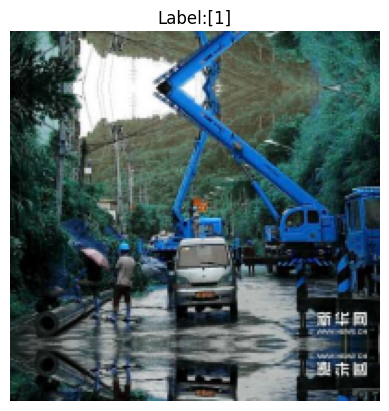

In [7]:
plt.imshow(images[0])
plt.axis('off')
plt.title(('Label:'+str(labels.iloc[0].values)))
plt.show()

- Here, we are displaying the first image from our dataset. The image clearly shows workers wearing helmets, and the corresponding class label is 1.

# Exploratory Data Analysis

## Visualizing Randomly Selected Images

- Lets plot the Random images with the labels

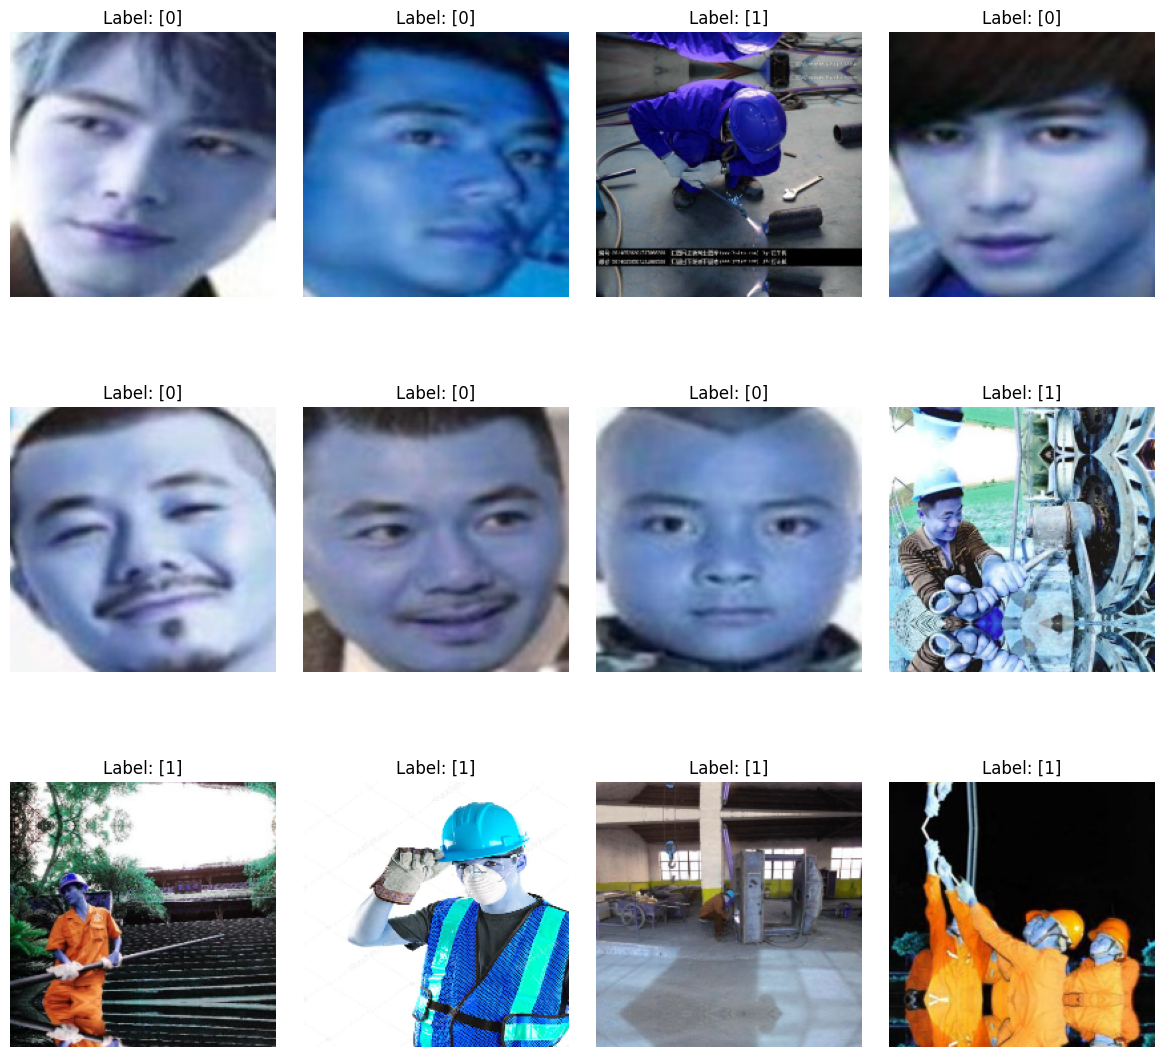

In [8]:
# Initialize a list to store randomly selected image indices
image_indice = []

plt.figure(figsize=(12, 12))

# Plot 12 random images from the dataset
for i in range(12):
    plt.subplot(3, 4, i + 1)

    # Randomly select an image index
    j = np.random.randint(len(images))

    # Store the index for later use (e.g., BGR to RGB conversion)
    image_indice.append(j)

    # Display the selected image
    plt.imshow(images[j])
    plt.title('Label: ' + str(labels.iloc[j].values))
    plt.axis('off')

# Adjust layout for better spacing
plt.tight_layout(pad=2)
plt.show()


* As mentioned in the dataset characteristics, the images are captured in varied environments—not limited to factories or construction sites.

* From the above plots, it's evident that some images show individuals without helmets, suggesting they were taken in general or non-industrial settings.

* Additionally, the images are in BGR format and should be converted to RGB for correct visualization.

* Note: The BGR or RGB format does not affect model performance—this distinction is only important for accurate display when plotting the images.



In [9]:
# Convert all images from BGR to RGB format for proper visualization
images_RGB=[]
for i in range(len(images)):
    images_RGB.append(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))

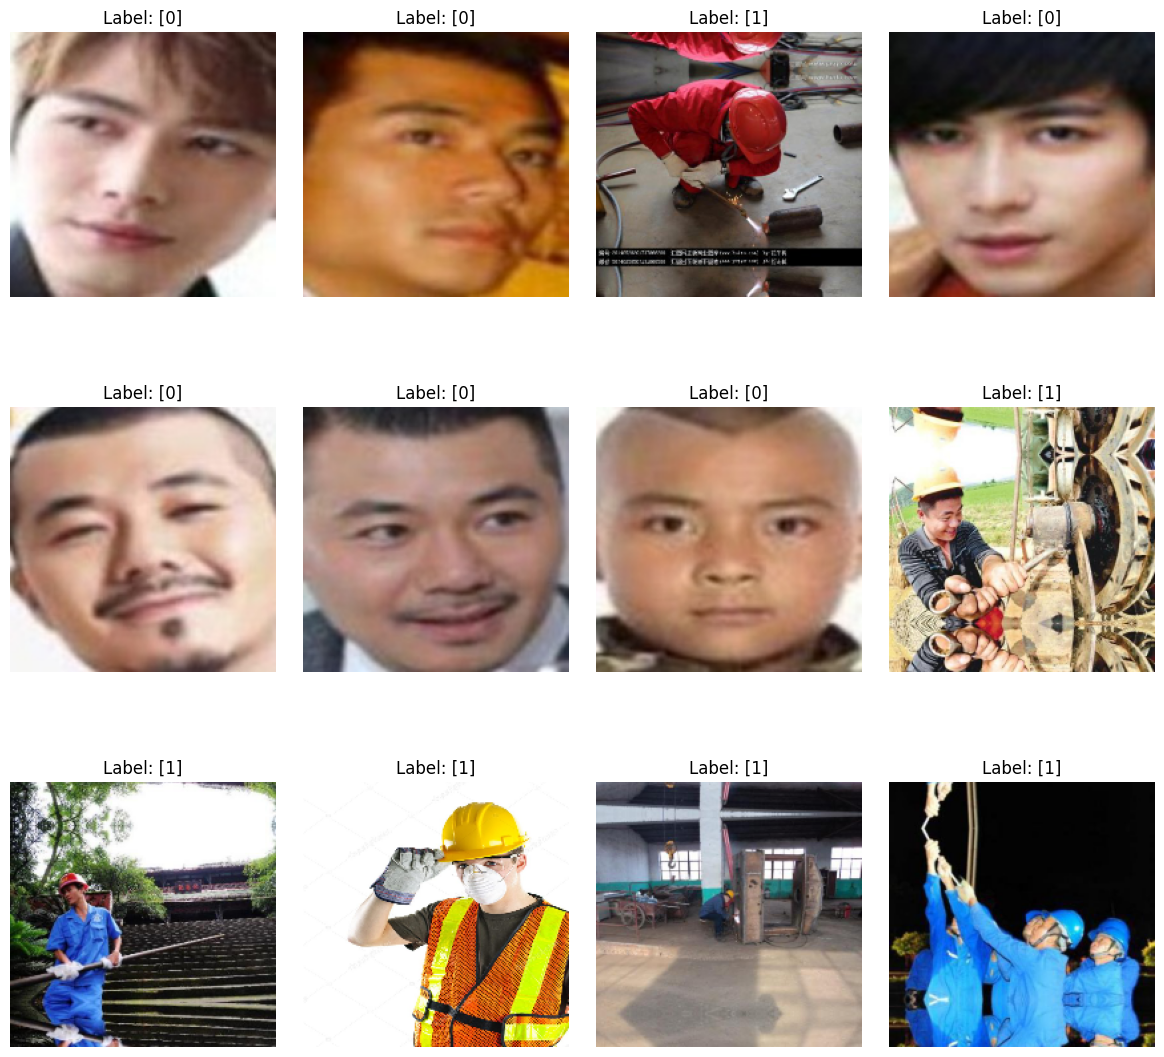

In [10]:
# Display the same 12 images again after converting them from BGR to RGB
plt.figure(figsize=(12, 12))

for i, j in enumerate(image_indice):
    plt.subplot(3, 4, i + 1)

    # Show the RGB-converted image
    plt.imshow(images_RGB[j])
    plt.title('Label: ' + str(labels.iloc[j].values))
    plt.axis('off')

# Adjust layout for better spacing
plt.tight_layout(pad=2)
plt.show()


- The above plots are intended solely for better visual clarity.

- It's evident that humans can interpret images more accurately in RGB format compared to BGR, which may display colors incorrectly (e.g., blue instead of red).

- While this color format doesn't affect model training, converting to RGB is important for human-friendly visualization.

## Checking for data imbalance

Label
0    320
1    311
Name: count, dtype: int64


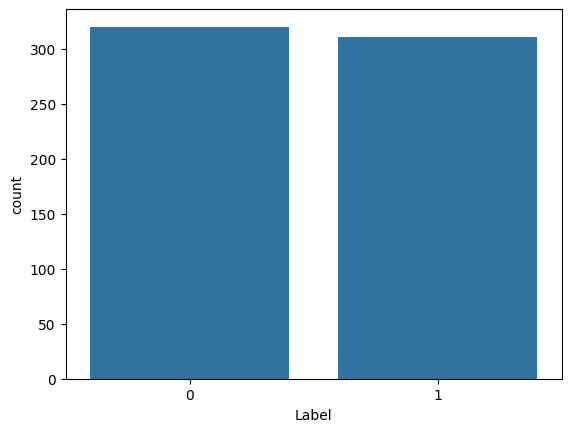

In [11]:
# Plot the class distribution using seaborn's countplot
sns.countplot(data=labels, x='Label')

# Print the number of samples in each class
print(labels['Label'].value_counts())


- As noted in the data dictionary, there are 320 images in class 0 and 311 images in class 1.

- From both the above plots and class distribution values, we can conclude that there is no significant class imbalance in the dataset.

- This balanced distribution is beneficial for training, as it helps the model learn without bias toward a particular class.

# Data Pre-Processing

## Image Filtering and Transformation

### Grayscale Image Processing

In [12]:
def plot_processed_image(image1, image2, n=0, gray=False):
    # Create a figure with 2 subplots
    fig, ax = plt.subplots(1, 2, figsize=(10, 7))

    # Plot the original image
    ax[0].imshow(images_RGB[n])
    ax[0].set_title('Original Image\nLabel: ' + str(labels.iloc[n].values))
    ax[0].axis('off')

    # Plot the processed image (grayscale if specified)
    if gray:
        ax[1].imshow(image2[n], cmap='gray')
    else:
        ax[1].imshow(image2[n])
    ax[1].set_title('Processed Image\nLabel: ' + str(labels.iloc[n].values))
    ax[1].axis('off')

    # Adjust layout and display
    plt.tight_layout()
    plt.show()


In [13]:
# Convert all RGB images to grayscale and store them in a new list
images_gray = []
for i in range(len(images_RGB)):
    images_gray.append(cv2.cvtColor(images_RGB[i], cv2.COLOR_RGB2GRAY))


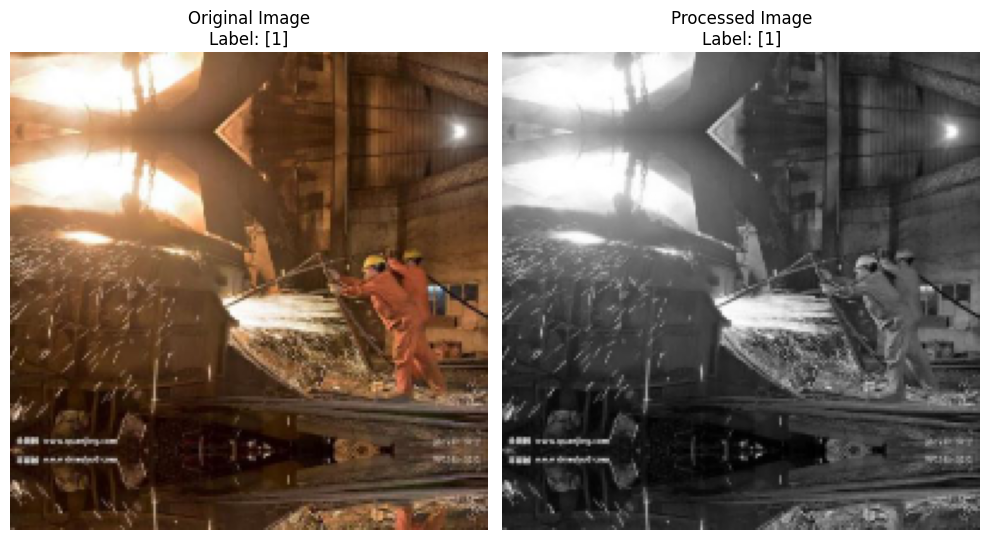

In [14]:
plot_processed_image(images,images_gray,n=5,gray=True)

- Here, we visualize both the color image and its corresponding grayscale version at index 1.

- As the next step, we can apply techniques like Gaussian Blur and Laplacian Edge Detection to explore further image processing.

- Note: For visualization, we are using the converted RGB format from BGR. However, for CNN model building, we will use the original BGR format without making any changes.

### Gaussian Blur Image Processing

In [15]:
# Apply Gaussian Blur to all RGB images and store the results in a new list
images_gaussian = []
for i in range(len(images_RGB)):
    images_gaussian.append(cv2.GaussianBlur(images_RGB[i], ksize=(3, 3), sigmaX=0))


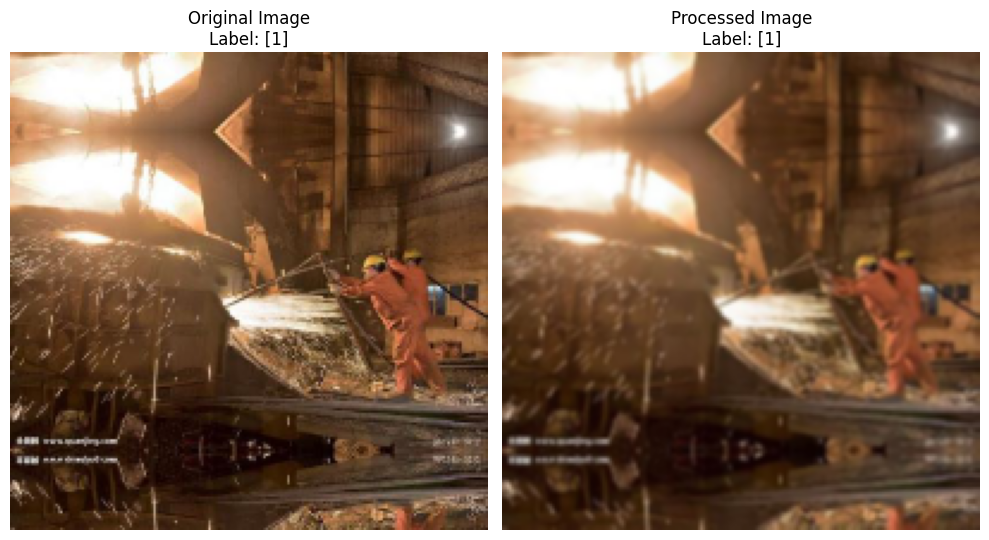

In [16]:
plot_processed_image(images,images_gaussian,n=5)

- Here, we observe the difference between the original color image and the blurred image, which has been processed using Gaussian Blur.
- Note that this step is purely for exploratory image processing and visualization purposes.

- For training the model, we will proceed using either grayscale or RGB image format as input to the convolutional layers, depending on the chosen approach.

- Note: For visualization, we are using the converted RGB format from BGR. However, for CNN model building, we will use the original BGR format without making any changes.

### Laplacian Edge Detection on Images

In [17]:
# Apply Laplacian edge detection to all grayscale images and store the results in a new list
images_laplacian = []
for i in range(len(images_RGB)):
    images_laplacian.append(cv2.Laplacian(images_gray[i], cv2.CV_64F))


- Note: For Laplacian image processing, we used grayscale images instead of RGB to avoid the noise that can result from applying the filter separately across all three color channels.

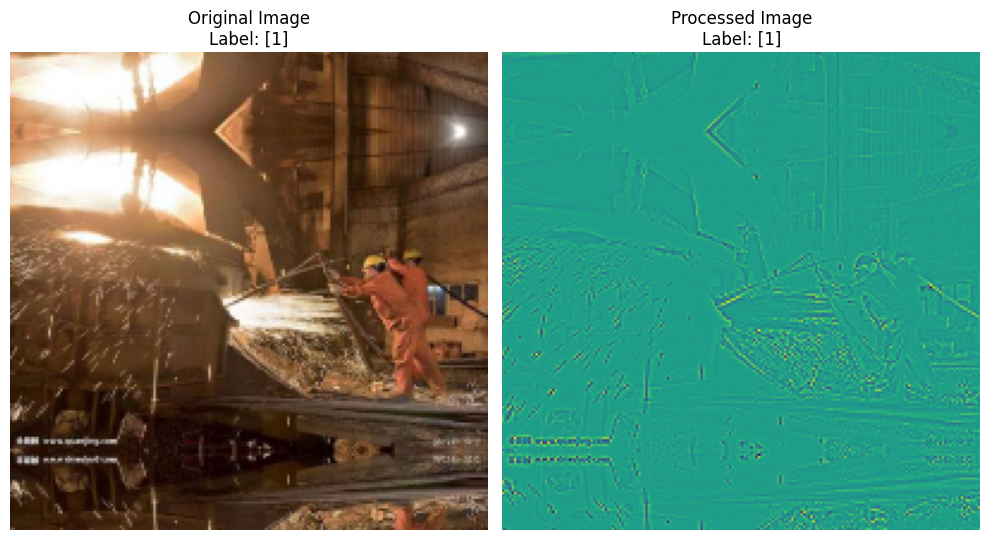

In [18]:
plot_processed_image(images,images_laplacian,n=5)

- Here, we observe the difference between the original color image and its Laplacian-processed version, which highlights the edges in the image.

- This comparison helps visualize how edge detection transforms the image by emphasizing regions with sharp intensity changes.


## Data Split with Class Balance

- As previously discussed, convolutional layers process pixel values and are not affected by the number of channels (whether the image is in RGB/BGR with 3 channels or grayscale with 1 channel).

- Since our dataset is relatively small (only 631 images), we are proceeding with the original BGR format (3 channels) to preserve as much information as possible.

- We also haven’t resized the images yet, because our next step involves building a basic CNN model from scratch (not using transfer learning).

- Transfer learning models (like VGG, ResNet, etc.) usually require a fixed input size (e.g., 224×224) and RGB format, so resizing and possible conversion to grayscale will be done at that stage if needed.

- For now, we are using the original image size and format to keep preprocessing minimal and observe how a simple CNN performs on raw data.

In [19]:
# Step 1: Split the data into training (80%) and temp (20%) sets
# Stratify ensures class distribution is maintained
x_train, x_temp, y_train, y_temp = train_test_split(
    np.array(images), labels,
    test_size=0.2,
    random_state=42,
    stratify=labels
)

# Step 2: Split the temp set equally into validation (10%) and test (10%)
x_val, x_test, y_val, y_test = train_test_split(
    x_temp, y_temp,
    test_size=0.5,
    random_state=42,
    stratify=y_temp
)


- We are using the original BGR format for splitting the dataset and building the CNN. Technically, there’s no difference between BGR and RGB in terms of data content, but results can still vary due to how the kernel interacts with pixel values during Conv2D multiplication. Here, we are simply using the original input as BGR.

In [20]:
print(f"Shape of the training set (X_train): {x_train.shape}")
print("-" * 55)
print(f"Shape of the validation set (X_val): {x_val.shape}")
print("-" * 55)
print(f"Shape of the test set (X_test): {x_test.shape}")


Shape of the training set (X_train): (504, 200, 200, 3)
-------------------------------------------------------
Shape of the validation set (X_val): (63, 200, 200, 3)
-------------------------------------------------------
Shape of the test set (X_test): (64, 200, 200, 3)


In [21]:
print("Class distribution in y_train (in %):")
print(y_train.value_counts(normalize=True) * 100)
print("-" * 35)

print("Class distribution in y_val (in %):")
print(y_val.value_counts(normalize=True) * 100)
print("-" * 35)

print("Class distribution in y_test (in %):")
print(y_test.value_counts(normalize=True) * 100)


Class distribution in y_train (in %):
Label
0        50.793651
1        49.206349
Name: proportion, dtype: float64
-----------------------------------
Class distribution in y_val (in %):
Label
0        50.793651
1        49.206349
Name: proportion, dtype: float64
-----------------------------------
Class distribution in y_test (in %):
Label
0        50.0
1        50.0
Name: proportion, dtype: float64


- Our dataset has been successfully split into training, validation, and test sets with the following distribution:

 - 504 images for training

 - 63 images for validation

 - 64 images for testing
- Each image has a shape of (200, 200, 3), which corresponds to 200×200 pixels with 3 color channels (BGR format).

- The class distribution was stratified during the split to maintain balance across all sets.

- This setup provides a solid foundation for training and evaluating our custom CNN model.

- In future steps like transfer learning, we’ll resize the images (e.g., to 224×224) and convert them to RGB, as required by the architecture.

## Image Pixel Normalization

In [22]:
print(f'Max and min pixel values in the training set: Max = {x_train.max()}, Min = {x_train.min()}')
print('-'*65)
print(f'Max and min pixel values in the test set: Max = {x_test.max()}, Min = {x_test.min()}')
print('-'*65)
print(f'Max and min pixel values in the validation set: Max = {x_val.max()}, Min = {x_val.min()}')


Max and min pixel values in the training set: Max = 255, Min = 0
-----------------------------------------------------------------
Max and min pixel values in the test set: Max = 255, Min = 0
-----------------------------------------------------------------
Max and min pixel values in the validation set: Max = 255, Min = 0


- As observed, the pixel values in our images range from 0 to 255, which is typical for RGB images.

- We will normalize these values to a [0, 1] range to reduce computational complexity during training and improve the efficiency of the optimization process.

- Normalization also helps the model converge faster and ensures numerical stability, especially when using gradient-based optimizers like Adam or SGD

In [23]:
# Normalize the image pixel values by scaling them to the range [0, 1]
# This is done by converting the data type to float and dividing by 255
x_train = x_train.astype('float') / 255
x_val = x_val.astype('float') / 255
x_test = x_test.astype('float') / 255

In [24]:
print(f'Max and min pixel values in the training set: Max = {x_train.max()}, Min = {x_train.min()}')
print('-'*65)
print(f'Max and min pixel values in the test set: Max = {x_test.max()}, Min = {x_test.min()}')
print('-'*65)
print(f'Max and min pixel values in the validation set: Max = {x_val.max()}, Min = {x_val.min()}')

Max and min pixel values in the training set: Max = 1.0, Min = 0.0
-----------------------------------------------------------------
Max and min pixel values in the test set: Max = 1.0, Min = 0.0
-----------------------------------------------------------------
Max and min pixel values in the validation set: Max = 1.0, Min = 0.0


- After normalization, the pixel values are scaled between 0 and 1 — with the maximum being 1 and the minimum being 0. This is beneficial for optimization, as it ensures faster convergence, reduces computational cost, and helps the model train more efficiently.

# Model Building

## Utility Functions

In [25]:
def plot_confusion_matrix(cf, group_Names=None, categories='auto', cmap='Blues',
                          cbar=True, percent=True, count=True, figsize=None,
                          title=None, sum_stats=True, xyplotlables=True, xyticks=True):

    # Prepare empty labels in case group_Names is not provided or mismatched
    blanks = ['' for i in range(cf.size)]

    # Use group names if provided and length matches the confusion matrix size
    if group_Names and len(group_Names) == cf.size:
        group_labels = [i for i in group_Names]
    else:
        group_labels = blanks

    # Count values in each cell
    if count:
        group_count = [f'{i:.0f}' for i in cf.flatten()]
    else:
        group_count = blanks

    # Percentage values in each cell
    if percent:
        group_percent = [f'{i / cf.flatten().sum():.2%}' for i in cf.flatten()]
    else:
        group_percent = blanks

    # Combine group name, count, and percent for each cell's annotation
    box_labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_labels, group_count, group_percent)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0], cf.shape[1])

    # Calculate statistics like Accuracy, Precision, Recall, F1 (only for binary classification)
    if sum_stats:
        Accuracy = np.trace(cf) / cf.sum()
        if len(cf) == 2:
            Precision = cf[1, 1] / sum(cf[:, 1]) if sum(cf[:, 1]) != 0 else 0
            Recall = cf[1, 1] / sum(cf[1, :]) if sum(cf[1, :]) != 0 else 0
            F1 = 2 * Precision * Recall / (Recall + Precision) if (Recall + Precision) != 0 else 0
            sum_text = f'\n\nAccuracy={Accuracy:.3f}\nPrecision={Precision:.3f}\nRecall={Recall:.3f}\nF1={F1:.3f}'
        else:
            sum_text = f'\n\nAccuracy={Accuracy:.3f}'
    else:
        sum_text = ''

    # Use default figure size if not provided
    if figsize is None:
        figsize = plt.rcParams.get('figure.figsize')

    # Disable x/y ticks if not requested
    if not xyticks:
        categories = False

    # Create the heatmap
    plt.figure(figsize=figsize)
    sns.heatmap(cf, annot=box_labels, cmap=cmap, cbar=cbar, fmt='',
                xticklabels=categories, yticklabels=categories)

    # Set axis labels
    if xyplotlables:
        plt.ylabel('True Values')
        plt.xlabel('Predicted Values' + sum_text)
    else:
        plt.xlabel(sum_text)

    # Set the plot title if provided
    if title:
        plt.title(title)


In [26]:
def plot_history(history, name, another_name):
    """
    Visualizes training and validation performance for two metrics over epochs.

    Parameters:
    - history: Keras History object returned by model.fit().
    - name: First metric to plot (e.g., 'loss', 'accuracy').
    - another_name: Second metric to plot (e.g., 'accuracy', 'recall').
    """

    # Create a figure with 2 subplots (side by side)
    fig, ax = plt.subplots(1, 2, figsize=(14, 6))

    # Plot the first metric (training and validation)
    ax[0].plot(history.history[name])                     # Training metric
    ax[0].plot(history.history['val_' + name])            # Validation metric
    ax[0].set_title('Model ' + name.capitalize())         # Title: e.g., "Model Accuracy"
    ax[0].set_xlabel('Epoch')                             # X-axis: Epochs
    ax[0].set_ylabel(name.capitalize())                   # Y-axis: Metric name
    ax[0].legend(['Train', 'Validation'])                 # Legend

    # Plot the second metric (training and validation)
    ax[1].plot(history.history[another_name])
    ax[1].plot(history.history['val_' + another_name])
    ax[1].set_title('Model ' + another_name.capitalize())
    ax[1].set_xlabel('Epoch')
    ax[1].set_ylabel(another_name.capitalize())
    ax[1].legend(['Train', 'Validation'])

    # Adjust layout for clean spacing
    plt.tight_layout()
    plt.show()


## Building a Simple CNN from Scratch

### Basic CNN Model Construction

#### Model 1

In [27]:
# Clears the current Keras session to free up memory and reset layer naming
tf.keras.backend.clear_session()

# Sets a global random seed to ensure reproducibility of results across runs (for all ops like shuffle, weight init, etc.)
tf.keras.utils.set_random_seed(812)

# Forces TensorFlow to run operations in a deterministic (repeatable) way for consistent results (some ops are non-deterministic by default)
tf.config.experimental.enable_op_determinism()

- Clears any existing backend session to remove leftover states.

- Sets a fixed random seed to make results reproducible across runs.

- Enables deterministic operations for consistent results.

- All three combined maximize reproducibility, though minor variations can still occur in environments like Colab due to hardware allocation differences.

- Here, we are building a CNN model from scratch. As discussed earlier, most pre-trained models used in transfer learning (like VGG, ResNet, etc.) require input images to be in RGB format and resized to 224×224. However, when building a CNN from scratch, the input image can have any shape and channel format (e.g., grayscale or RGB), as long as the input shape is consistent and supported by your model architecture.

In [28]:
# Initialize a sequential model
model = Sequential()

# First convolutional layer: 64 filters of size 3x3, ReLU activation, same padding
# Input shape is 200x200 RGB image
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(200, 200, 3)))

# First max pooling layer with pool size 2x2, same padding
model.add(MaxPooling2D((2, 2), padding='same'))

# Second convolutional layer: 32 filters, 3x3 kernel, ReLU activation, same padding
model.add(Conv2D(32, (3, 3), activation='relu', padding="same"))

# Second max pooling layer
model.add(MaxPooling2D((2, 2), padding='same'))

# Third convolutional layer: 32 filters, 3x3 kernel, ReLU activation, same padding
model.add(Conv2D(32, (3, 3), activation='relu', padding="same"))

# Third max pooling layer
model.add(MaxPooling2D((2, 2), padding='same'))

# Flattening the output of conv layers to feed into dense layers
model.add(Flatten())

# Fully connected dense layer with 100 neurons and ReLU activation
model.add(Dense(100, activation='relu'))

# Output layer with 1 neuron and sigmoid activation (for binary classification)
model.add(Dense(1, activation='sigmoid'))

# Define SGD optimizer with learning rate 0.01 and momentum 0.9
opt = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)

# Compile the model using binary cross-entropy loss and accuracy as metric
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])


- CNN Architecture Summary
 - On the CNN side, we have a total of 6 layers:

   - 3 convolutional layers using 3×3 kernels with ReLU activation and 'same' padding.

   - Each convolutional layer is followed by a MaxPooling2D layer using 2×2 kernels with 'same' padding.

 - The convolutional layers help in feature extraction from input images, capturing spatial hierarchies like edges, textures, and patterns.

 - Max pooling layers reduce the spatial dimensions (downsampling), which:

   - Helps in reducing computational complexity

   - Controls overfitting

   - Provides translation invariance
 - All convolutional layers use ReLU activation, which introduces non-linearity and speeds up training.

- Dense (Fully Connected) Layers
After flattening the output from the CNN block, we have:

 - A Dense layer with 100 neurons and ReLU activation — this acts as a hidden layer to learn high-level representations.

 - A final output layer with 1 neuron and sigmoid activation — suitable for binary classification, as it outputs a probability between 0 and 1.

- Compilation Details
 - Optimizer: Stochastic Gradient Descent (SGD) with:

 - Learning rate = 0.01

 - Momentum = 0.9

 - Loss Function: Binary Crossentropy — ideal for binary classification.

 - Evaluation Metric: Accuracy




In [29]:
# Print model architecture summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 200, 200, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 100, 100, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 100, 100, 32)   │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 50, 50, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 50, 50, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 25, 25, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 20000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │     2,000,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,029,705 (7.74 MB)

 Trainable params: 2,029,705 (7.74 MB)

 Non-trainable params: 0 (0.00 B)

- Total Parameters: The model has 2,029,705 parameters, and all of them are trainable, meaning they will be updated during training via backpropagation.

- Trainable Parameters: Since all layers are trainable, the entire model is subject to optimization for better performance.

- Dense Layer Contribution: The majority of parameters (around 2 million) come from the first dense layer, due to flattening the feature map of size 25×25×32 = 20,000, which is connected to 100 neurons.

- Activation Function: Since this is a binary classification task, the final layer should use sigmoid, not softmax (used for multi-class).

- Input & Output Shape: Input image size is 200×200×3, and the output is a single neuron (1) which outputs a probability between 0 and 1 for binary classification.

In [30]:
# Train the model using training data (x_train, y_train) for 15 epochs
history_1 = model.fit(
    x_train, y_train,                # Training data and labels
    epochs=15,                       # Number of times the model will see the entire training dataset
    validation_data=(x_val, y_val), # Data used to evaluate the model at the end of each epoch
    shuffle=True,                   # Shuffle training data before each epoch to reduce overfitting
    batch_size=64,                  # Number of samples per gradient update
    verbose=2                       # Display one line per epoch (no progress bar, just summary)
)


Epoch 1/15
8/8 - 4s - 545ms/step - accuracy: 0.5496 - loss: 0.6789 - val_accuracy: 0.8571 - val_loss: 0.6380
Epoch 2/15
8/8 - 1s - 106ms/step - accuracy: 0.7183 - loss: 0.5897 - val_accuracy: 0.5714 - val_loss: 0.6866
Epoch 3/15
8/8 - 1s - 106ms/step - accuracy: 0.6944 - loss: 0.5164 - val_accuracy: 0.8571 - val_loss: 0.3084
Epoch 4/15
8/8 - 1s - 109ms/step - accuracy: 0.8492 - loss: 0.3882 - val_accuracy: 0.8413 - val_loss: 0.3716
Epoch 5/15
8/8 - 1s - 157ms/step - accuracy: 0.8849 - loss: 0.3021 - val_accuracy: 0.8095 - val_loss: 0.3794
Epoch 6/15
8/8 - 1s - 153ms/step - accuracy: 0.9266 - loss: 0.2033 - val_accuracy: 0.9206 - val_loss: 0.1461
Epoch 7/15
8/8 - 1s - 158ms/step - accuracy: 0.9544 - loss: 0.1289 - val_accuracy: 0.9524 - val_loss: 0.0933
Epoch 8/15
8/8 - 1s - 104ms/step - accuracy: 0.9762 - loss: 0.0860 - val_accuracy: 1.0000 - val_loss: 0.0493
Epoch 9/15
8/8 - 1s - 107ms/step - accuracy: 0.9802 - loss: 0.0667 - val_accuracy: 0.9683 - val_loss: 0.0535
Epoch 10/15
8/8 - 1

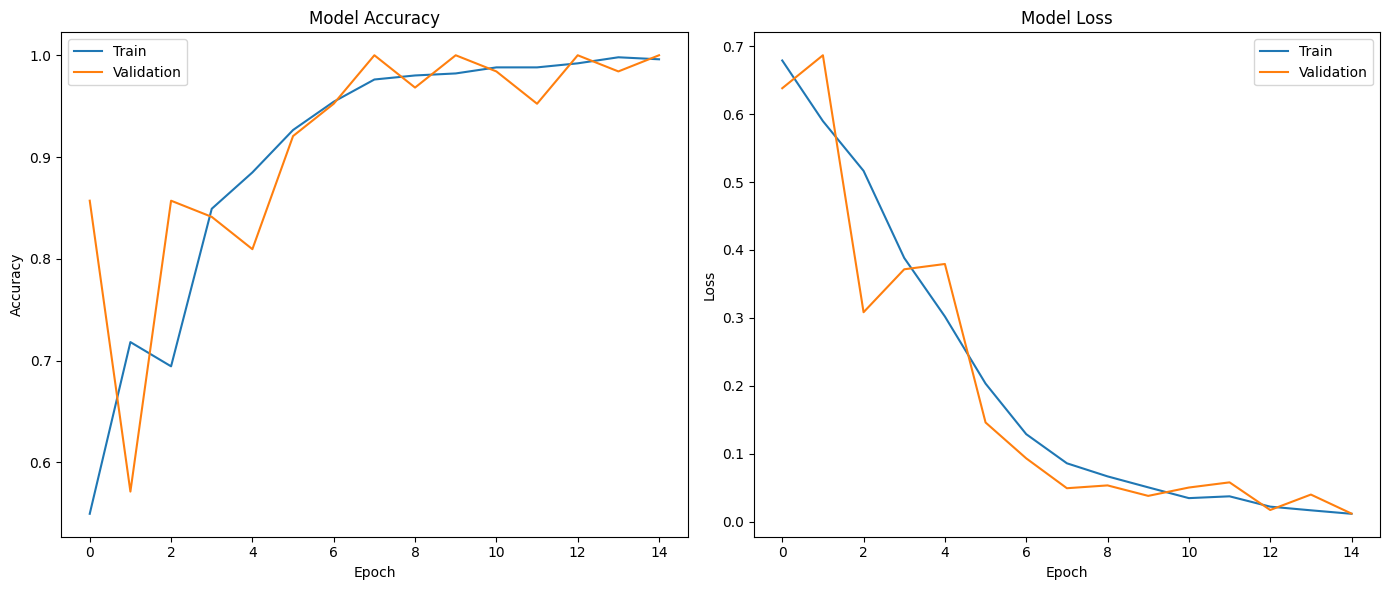

In [31]:
plot_history(history_1, 'accuracy', 'loss')

Accuracy

- The accuracy steadily increases as the epochs progress.

- Due to the relatively high learning rate of 0.01 in SGD, the curve is not perfectly smooth — which is expected — but this does not negatively impact the final results.

- On the validation accuracy side, the first few epochs show fluctuations (with some initial values higher than epoch 1), which is normal during training.

- Ultimately, the model achieves very close results for training and validation accuracy, with validation accuracy slightly higher (1.00) compared to training accuracy (0.99), indicating no signs of overfitting.

Loss

- The loss curve is smoother than the accuracy curve, showing stable convergence.

- Both training and validation losses are very close: training loss at 0.0117 and validation loss at 0.0119.

- The minimal gap between them confirms that the model has generalized well.

- The low final loss values indicate effective optimization and minimal error in predictions.

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step


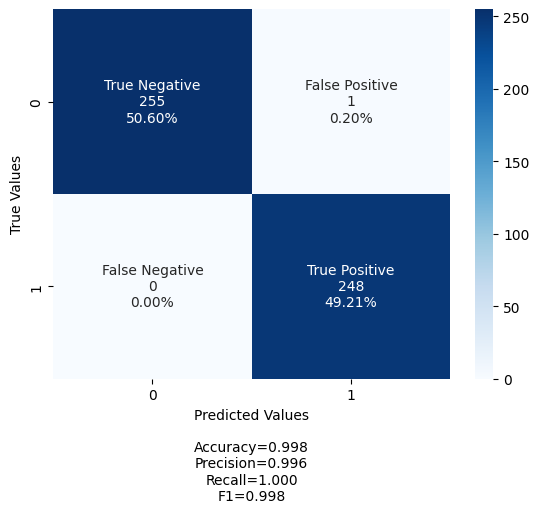

In [32]:
## Confusion Matrix on unsee test set
y_pred1 = model.predict(x_train)
for i in range(len(y_train)):
    if y_pred1[i]>0.5:
        y_pred1[i]=1
    else:
        y_pred1[i]=0



cm2=confusion_matrix(y_train, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
#categories = [ 'Not_Fraud','Fraud']
plot_confusion_matrix(cm2,
                      group_Names=labels,
                      #categories=categories,
                      cmap='Blues')

- In this project, our primary evaluation metric is accuracy, as the task is a general classification problem.

- However, in a real-world safety context, precision for Class 0 (No Helmet) is critically important — to avoid falsely classifying workers without helmets as wearing helmets, which could lead to safety risks.detect a worker without a helmet could lead to severe safety violations.

- In this case, minimizing false positves (workers without helmets classified as wearing helmets) is the top priority, since missing such cases is more dangerous than raising an unnecessary alert.

Error Analysis

- False Negatives (FN): 0 → No workers without helmets were missed by the model, which is ideal from a safety standpoint.

- False Positives (FP): 1 → Only one worker wearing a helmet was mistakenly classified as not wearing one, meaning the model raised one unnecessary alert — acceptable in safety-critical applications.

Performance Summary

 - Accuracy: 0.99 - Precision: 0.99 - Recall: 1.00 - F1-Score: 0.99

- These results indicate excellent predictive performance and perfect recall for the safety-critical class.

Key Takeaways

- Achieving perfect recall for Class 0 means the model meets the primary safety objective.

- For a basic CNN model, these metrics are impressive, especially without advanced techniques such as:

 - Deeper dense layers

 - Extensive data augmentation

 - Regularization strategies (Dropout, L2, etc.)

- There is still room for improvement, but the model is already well-suited for deployment in helmet detection scenarios.

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


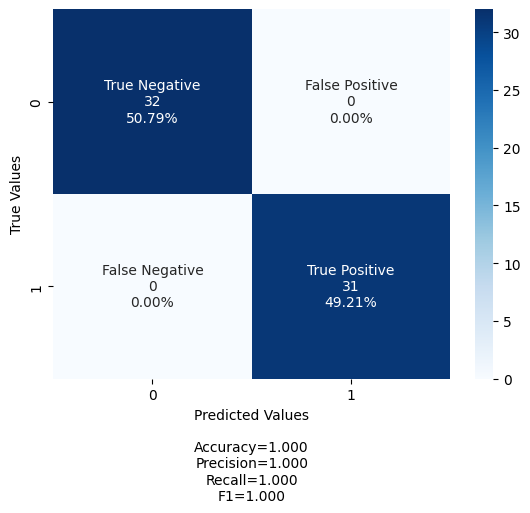

In [33]:
## Confusion Matrix on unsee test set
y_pred1 = model.predict(x_val)
for i in range(len(y_val)):
    if y_pred1[i]>0.5:
        y_pred1[i]=1
    else:
        y_pred1[i]=0



cm2=confusion_matrix(y_val, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
#categories = [ 'Not_Fraud','Fraud']
plot_confusion_matrix(cm2,
                      group_Names=labels,
                      #categories=categories,
                      cmap='Blues')

- All training metrics reached 100%, indicating the model learned the training data exceptionally well.

- The history plot shows no visible signs of overfitting — training and validation curves remain closely aligned — suggesting strong generalization capability.

- This balance between perfect training performance and stable validation results implies the model is neither underfitting nor memorizing, but effectively capturing underlying patterns in the data.

#### Model2

In [34]:
# Clears the current Keras session to free up memory and reset layer naming
tf.keras.backend.clear_session()

# Sets a global random seed to ensure reproducibility of results across runs (for all ops like shuffle, weight init, etc.)
tf.keras.utils.set_random_seed(812)

# Forces TensorFlow to run operations in a deterministic (repeatable) way for consistent results (some ops are non-deterministic by default)
tf.config.experimental.enable_op_determinism()

- Clears any existing backend session to remove leftover states.

- Sets a fixed random seed to make results reproducible across runs.

- Enables deterministic operations for consistent results.

- All three combined maximize reproducibility, though minor variations can still occur in environments like Colab due to hardware allocation differences.

In [35]:
# Initialize a sequential model to stack layers linearly
model2 = Sequential()

# --- Convolutional Base ---

# 1st Convolutional Layer: 64 filters of size 3x3, ReLU activation, same padding
# Input image shape: 200x200 RGB image (3 channels)
model2.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(200, 200, 3)))

# 1st Max Pooling Layer: reduces spatial dimensions, pool size 2x2
model2.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

# 2nd Convolutional Layer: 32 filters of size 3x3, ReLU activation
model2.add(Conv2D(32, (3, 3), activation='relu', padding='same'))

# 2nd Max Pooling Layer
model2.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

# 3rd Convolutional Layer: 32 filters, 3x3 kernel
model2.add(Conv2D(32, (3, 3), activation='relu', padding='same'))

# 3rd Max Pooling Layer
model2.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

# 4th Max Pooling Layer (without a convolution before it)
# Helps further reduce dimensionality before flattening
model2.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

# --- Dense (Fully Connected) Layers ---

# Flatten the output from convolutional layers to feed into Dense layers
model2.add(Flatten())

# Fully connected Dense layer with 100 neurons and ReLU activation
model2.add(Dense(100, activation='relu'))

# Output Layer: Single neuron with sigmoid activation for binary classification (helmet vs no helmet)
model2.add(Dense(1, activation='sigmoid'))

- Although the previous model achieved 100% metrics on the validation set, we identified errors that need correction. Therefore, we are introducing the following improvements.

- In this model, we are using the same architecture as the previous one, with one key change — an additional pooling layer has been added. The motivation behind this is that helmets occupy a relatively small region in the image. By adding one more pooling layer, we aim to help the network focus on high-level, spatially compressed features. This could make it easier for the model to detect small but important patterns like helmets.

In [36]:
# Print model architecture summary
model2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 200, 200, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 100, 100, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 100, 100, 32)   │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 50, 50, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 50, 50, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 25, 25, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       540,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 570,505 (2.18 MB)

 Trainable params: 570,505 (2.18 MB)

 Non-trainable params: 0 (0.00 B)

- Added one extra pooling layer, which reduced the spatial dimensions from 25×25×32 to 13×13×32

- Flatten layer input reduced from 20,000 units to 5,408 units

- Dense layer input size dropped, so trainable parameters reduced from 2,029,705 to 570,505

- Fewer parameters mean faster training and lower risk of overfitting

- Pooling helps focus on smaller features like helmets by discarding irrelevant background details

- Efficient design choice given small object size and limited data

In [37]:
# Define Adam optimizer with a learning rate of 0.001
opt = keras.optimizers.Adam(learning_rate=0.001)

# Compile the model with binary cross-entropy loss and accuracy as the evaluation metric
model2.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])


- We made a notable change by switching from SGD to the Adam optimizer, as Adam includes an adaptive momentum mechanism that adjusts learning dynamically.

- This helps in achieving faster and more stable convergence compared to SGD.

- In previous models, although the results were decent, the training curve showed instability — likely due to fixed momentum in SGD.

- Adam helps overcome this by combining the benefits of both RMSProp and Momentum, leading to smoother optimization, especially in complex models.

In [38]:
# Train the model using training data (x_train, y_train) for 15 epochs
history_2 = model2.fit(
    x_train, y_train,                # Training data and labels
    epochs=15,                       # Number of times the model will see the entire training dataset
    validation_data=(x_val, y_val), # Data used to evaluate the model at the end of each epoch
    shuffle=True,                   # Shuffle training data before each epoch to reduce overfitting
    batch_size=64,                  # Number of samples per gradient update
    verbose=2                       # Display one line per epoch (no progress bar, just summary)
)

Epoch 1/15
8/8 - 4s - 459ms/step - accuracy: 0.5794 - loss: 0.6026 - val_accuracy: 0.5079 - val_loss: 0.5793
Epoch 2/15
8/8 - 2s - 198ms/step - accuracy: 0.8929 - loss: 0.3018 - val_accuracy: 0.9841 - val_loss: 0.1278
Epoch 3/15
8/8 - 1s - 113ms/step - accuracy: 0.9603 - loss: 0.1138 - val_accuracy: 1.0000 - val_loss: 0.0333
Epoch 4/15
8/8 - 1s - 108ms/step - accuracy: 0.9960 - loss: 0.0255 - val_accuracy: 0.9841 - val_loss: 0.0357
Epoch 5/15
8/8 - 1s - 103ms/step - accuracy: 0.9940 - loss: 0.0265 - val_accuracy: 0.9524 - val_loss: 0.1086
Epoch 6/15
8/8 - 1s - 153ms/step - accuracy: 0.9921 - loss: 0.0228 - val_accuracy: 0.9683 - val_loss: 0.0588
Epoch 7/15
8/8 - 1s - 104ms/step - accuracy: 0.9881 - loss: 0.0314 - val_accuracy: 0.9206 - val_loss: 0.2184
Epoch 8/15
8/8 - 1s - 108ms/step - accuracy: 0.9802 - loss: 0.0548 - val_accuracy: 1.0000 - val_loss: 0.0110
Epoch 9/15
8/8 - 1s - 154ms/step - accuracy: 0.9821 - loss: 0.0601 - val_accuracy: 1.0000 - val_loss: 0.0227
Epoch 10/15
8/8 - 1

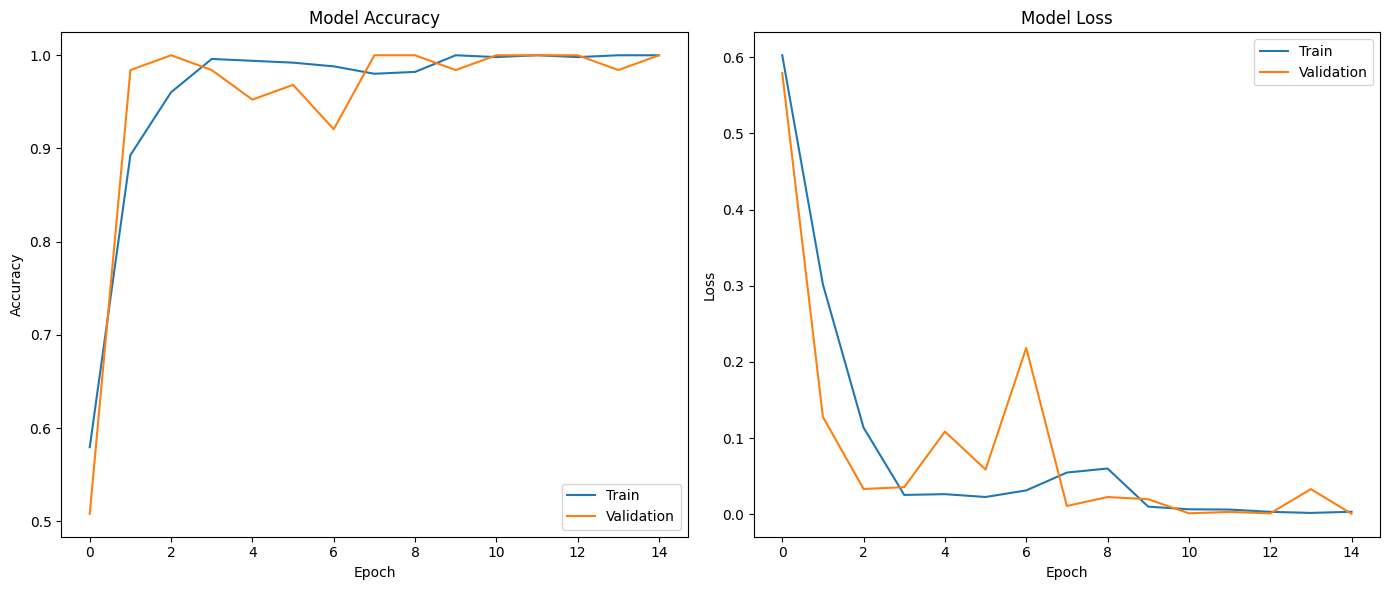

In [39]:
plot_history(history_2, 'accuracy', 'loss')

- The Adam optimizer delivered the best results so far, achieving 100% accuracy with a loss value very close to zero.

- Additionally, Adam outperformed SGD slightly, as its adaptive learning rate and momentum components help it converge faster and handle parameter updates more efficiently.

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step


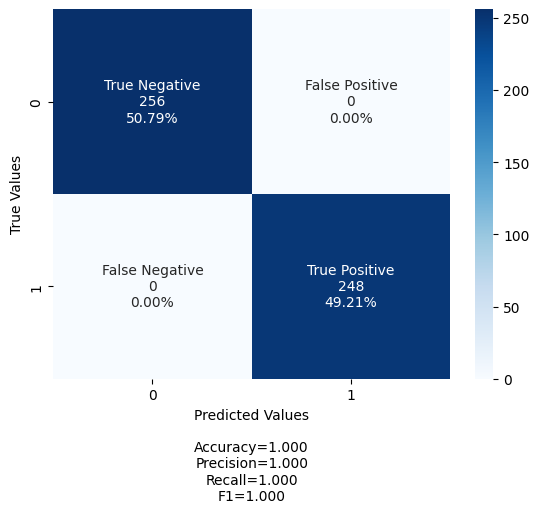

In [40]:
## Confusion Matrix on unsee test set
y_pred1 = model2.predict(x_train)
for i in range(len(y_train)):
    if y_pred1[i]>0.5:
        y_pred1[i]=1
    else:
        y_pred1[i]=0



cm2=confusion_matrix(y_train, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
#categories = [ 'Not_Fraud','Fraud']
plot_confusion_matrix(cm2,
                      group_Names=labels,
                      #categories=categories,
                      cmap='Blues')

- There are no critical observations here since we achieved 100% across all training metrics

- Even though we achieved 100% on training metrics, the history plot doesn’t show signs of overfitting — indicating the model generalized well.

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


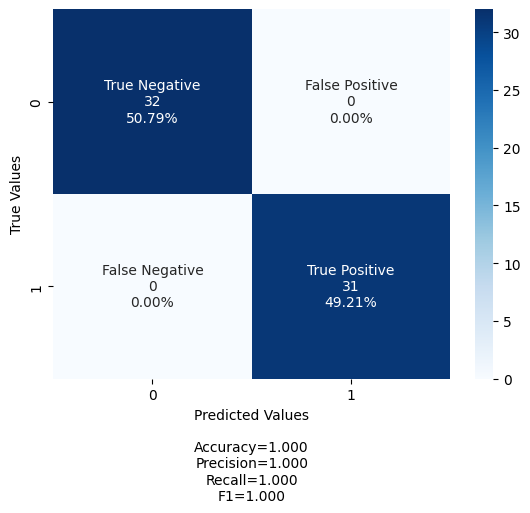

In [41]:
## Confusion Matrix on unsee test set
y_pred1 = model2.predict(x_val)
for i in range(len(y_val)):
    if y_pred1[i]>0.5:
        y_pred1[i]=1
    else:
        y_pred1[i]=0



cm2=confusion_matrix(y_val, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
#categories = [ 'Not_Fraud','Fraud']
plot_confusion_matrix(cm2,
                      group_Names=labels,
                      #categories=categories,
                      cmap='Blues')

- As expected and confirmed by the history plot, we achieved 100% on the validation set as well, making this our best-performing model so far.

- However, since we’re in the learning phase, it’s important to test the model’s robustness by applying data augmentation.

- This will introduce variability and noise, helping us evaluate how well the model generalizes to slightly altered or unseen data.

- A model that performs well even after augmentation is more likely to succeed in real-world scenarios where data is rarely clean or consistent.

## VGG-16 Model Construction

### Data Preprocessing for VGG16 Transfer Learning

- Our original image size is 200×200, but for transfer learning models like VGG16, the input must be 224×224 with 3 RGB channels. Therefore, we take the already normalized x_train, x_val, and x_test datasets, resize them to 224×224, and convert the color channels from BGR (default in OpenCV) to RGB. This ensures compatibility with VGG16’s pretrained weights and maintains the correct color representation.

In [42]:
print(f"Shape of the training set (X_train): {x_train.shape}")
print("-" * 55)
print(f"Shape of the validation set (X_val): {x_val.shape}")
print("-" * 55)
print(f"Shape of the test set (X_test): {x_test.shape}")

Shape of the training set (X_train): (504, 200, 200, 3)
-------------------------------------------------------
Shape of the validation set (X_val): (63, 200, 200, 3)
-------------------------------------------------------
Shape of the test set (X_test): (64, 200, 200, 3)


- At this stage, we are inspecting the shape of the datasets before any resizing or channel conversion.

- The dimensions (samples, height, width, channels) confirm that all images are currently 200×200 pixels with 3 channels (in BGR format since they were loaded using OpenCV).

- This helps verify that the dataset loading step worked correctly before proceeding to resizing (224×224) and converting from BGR to RGB for compatibility with VGG16.

In [43]:
x_train_vg = []  # List to store the preprocessed training images

for i in range(len(x_train)):
    # Resize the image from 200x200 to 224x224 for VGG16 compatibility
    img_resized = cv2.resize(
        (x_train[i]*255).astype('uint8'),  # Ensure dtype is float32 for TensorFlow/Keras
        (224, 224),
        interpolation=cv2.INTER_LINEAR  # Use linear interpolation for smooth upscaling
    )

    # Convert color space from BGR (OpenCV default) to RGB (required by VGG16)
    img_rgb = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)

    # Append the processed image to the list
    x_train_vg.append(img_rgb)


In [44]:
# Initialize an empty list to store the resized and RGB-converted validation images
x_val_vg = []

# Loop through each image in the validation dataset
for i in range(len(x_val)):
    # Resize the image to 224x224 pixels using bilinear interpolation for VGG input
    img_resized = cv2.resize((x_val[i]*255).astype('uint8'), (224, 224), interpolation=cv2.INTER_LINEAR)

    # Convert the resized image from BGR to RGB color space
    img_rgb = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)

    # Append the processed image to the validation list
    x_val_vg.append(img_rgb)


In [45]:
# Preprocessing test data: resize to (224, 224) and convert from BGR to RGB
x_test_vg = []
for i in range(len(x_test)):
    img_resized = cv2.resize((x_test[i]*255).astype('uint8'), (224, 224), interpolation=cv2.INTER_LINEAR)
    img_rgb = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)
    x_test_vg.append(img_rgb)


- In the above step, we converted images from BGR to RGB and resized them from 200×200 to 224×224 pixels, which is crucial for transfer learning with models like VGG16, as they expect a fixed input size and RGB channel order.

- We multiplied the normalized inputs (x_train, x_val, x_test) by 255 and converted them to uint8 because VGG16’s preprocessing expects pixel values in the range 0–255 and in the uint8 format for proper compatibility.

- This preprocessing was applied consistently to all datasets — x_train, x_val, and x_test — ensuring the model sees data in the same format during training, validation, and testing.

- Maintaining uniform preprocessing helps preserve color accuracy, matches the pretrained model’s input requirements, and prevents potential performance degradation.

In [46]:
x_train_vg = np.array(x_train_vg)
x_val_vg   = np.array(x_val_vg)
x_test_vg  = np.array(x_test_vg)

print(f"Final shape of the training set (x_train_vg): {x_train_vg.shape}")
print("-" * 55)
print(f"Final shape of the validation set (x_val_vg): {x_val_vg.shape}")
print("-" * 55)
print(f"Final shape of the test set (x_test_vg): {x_test_vg.shape}")

Final shape of the training set (x_train_vg): (504, 224, 224, 3)
-------------------------------------------------------
Final shape of the validation set (x_val_vg): (63, 224, 224, 3)
-------------------------------------------------------
Final shape of the test set (x_test_vg): (64, 224, 224, 3)


- At this stage, we have obtained image shapes that are fully compatible with VGG16 — dimensions are 224×224 and the channels are in RGB format.

- Initially, we used a for loop to resize and convert images, storing the results in Python lists. Since deep learning models in TensorFlow/Keras require NumPy arrays for efficient computation and to access attributes like .shape, we converted these lists into arrays.

- This conversion also ensures consistent data type handling (float32), which improves compatibility with pretrained models, reduces memory usage, and speeds up training.

In [47]:
# Apply VGG16 preprocessing (scaling and mean subtraction) to training, validation, and test images.
x_train_vg = preprocess_input(x_train_vg)

x_val_vg = preprocess_input(x_val_vg)

x_test_vg = preprocess_input(x_test_vg)

- Apply VGG16-specific preprocessing (scaling and mean subtraction) to all datasets.

- Ensure training, validation, and test images are preprocessed identically.

- This prepares images in the format expected by VGG16 for accurate predictions.

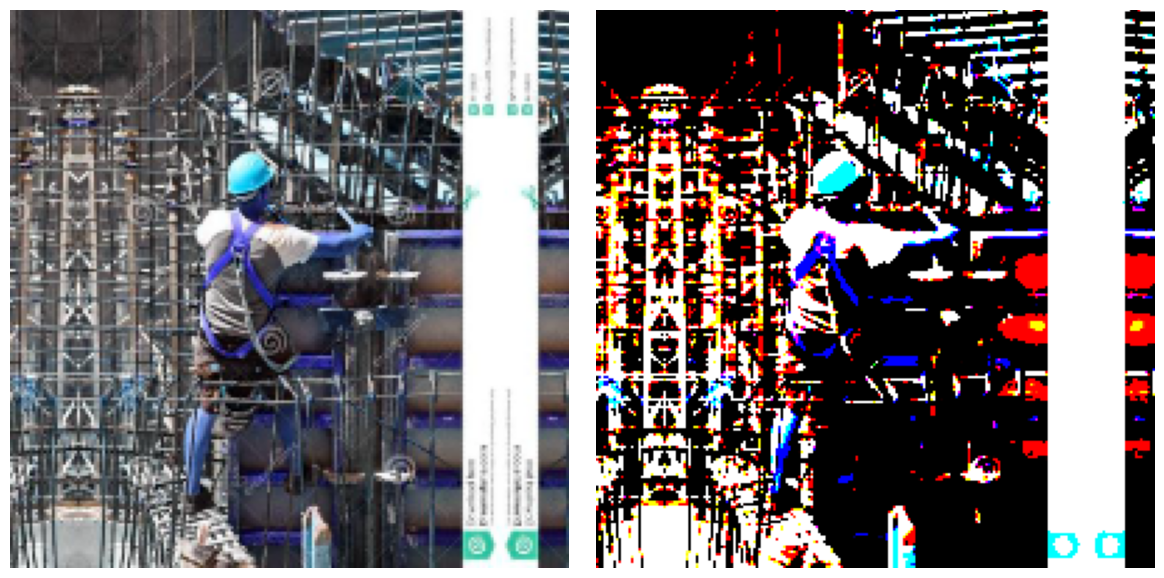

In [48]:
# Create a figure with 1 row and 2 columns of subplots, size set to 12x7 inches
fig, ax = plt.subplots(1, 2, figsize=(12, 7))

# Display the first image from the original training dataset
ax[0].imshow(x_train[0])
ax[0].axis('off')  # Remove axis for a cleaner display

# Display the first image from the resized/processed training dataset
ax[1].imshow(x_train_vg[0])
ax[1].axis('off')  # Remove axis for a cleaner display

# Adjust spacing between subplots for better layout
plt.tight_layout(pad=2)

# Show the figure
plt.show()

- We can clearly see that the images are processed to be compatible with VGG16, but this format is not ideal for visualization.

- The model expects input in this specific preprocessed format, which involves mean subtraction and scaling, resulting in pixel values outside the usual [0–1] or [0–255] range.

- The warning from matplotlib appears because it expects image data within [0–1] for floats or [0–255] for integers, but VGG16 preprocessing changes this range.

- For visualization purposes, the images need to be converted back to the standard pixel range by reversing the preprocessing steps.

- This difference in expected pixel ranges is important to understand when working with pretrained models like VGG16.

### VGG-16 (Base) Model

In [49]:
# Clears the current Keras session to free up memory and reset layer naming
tf.keras.backend.clear_session()

# Sets a global random seed to ensure reproducibility of results across runs (for all ops like shuffle, weight init, etc.)
tf.keras.utils.set_random_seed(812)

# Forces TensorFlow to run operations in a deterministic (repeatable) way for consistent results (some ops are non-deterministic by default)
tf.config.experimental.enable_op_determinism()

- Clears any existing backend session to remove leftover states.

- Sets a fixed random seed to make results reproducible across runs.

- Enables deterministic operations for consistent results.

- All three combined maximize reproducibility, though minor variations can still occur in environments like Colab due to hardware allocation differences.

In [50]:
# Load the VGG16 model pre-trained on ImageNet with include_top=False,
# which excludes the fully connected (dense) layers and keeps only convolutional layers.
# Input shape is set to 224x224 with 3 color channels (RGB).
VGG_Model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Display the model summary showing the convolutional layers only.
VGG_Model.summary()


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

- The VGG16 model contains 14,714,688 parameters, which come from the convolutional layers since we loaded the model without the top dense layers.

- Initially, all these parameters are trainable by default.

- For our HelmNet dataset, we will freeze these convolutional layers to prevent their weights from updating during training.

- Freezing helps leverage the pretrained features while avoiding overfitting on our small dataset.

- This approach reduces training time and improves generalization by using learned representations from ImageNet.

Note: An important point is that our final pooling layer outputs a 7x7 feature map, which is smaller than the 13x13 output in our previous model. We will continue with this because our helmet occupies a relatively small area in the images, making the smaller spatial dimension suitable for capturing relevant features.

In [51]:
# Freeze all layers of the VGG model to prevent their weights from being updated during training.
# This allows using the pretrained convolutional features as fixed feature extractors.
for layer in VGG_Model.layers:
    layer.trainable = False

- This is a crucial step when using pretrained models like VGG16: we explicitly freeze all the layers to prevent their weights from being updated during training.

- By doing this, we leverage the powerful pretrained convolutional features learned from a large dataset (ImageNet) without altering them.

- This approach is especially effective for small datasets like ours (631 images), as it reduces the risk of overfitting.

- Freezing the layers also speeds up training since fewer parameters are updated.

- Essentially, we use VGG16 as a fixed feature extractor and train only the new classification layers added on top.

In [52]:
VGG_Base_Model = Sequential()

# Add the pre-trained VGG16 convolutional base (frozen layers) as the feature extractor
VGG_Base_Model.add(VGG_Model)

# Flatten the convolutional output to convert 3D feature maps into 1D feature vectors
VGG_Base_Model.add(Flatten())

# Add a final Dense layer with sigmoid activation for binary classification output
VGG_Base_Model.add(Dense(1, activation='sigmoid'))

- Here, we use the convolutional layers from VGG16 as a fixed feature extractor and add a single output layer for classification.

- The Flatten layer serves as a bridge, converting the 3D convolutional feature maps into 1D vectors that can be fed into the dense layer.

- The final Dense layer with sigmoid activation outputs a probability for binary classification.

- This simple architecture leverages the powerful pretrained convolutional features while keeping the classification head lightweight, suitable for small datasets.

In [53]:
VGG_Base_Model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │        25,089 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,739,777 (56.23 MB)

 Trainable params: 25,089 (98.00 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

- Here, the model summary shows the original VGG16 convolutional base outputting a (7, 7, 512) feature map with 14,714,688 parameters.

- After flattening, the output becomes a 25,088-dimensional vector, which feeds into the newly added dense layer with 25,089 trainable parameters.

- Since we froze all VGG16 layers, those 14.7 million parameters are non-trainable and remain fixed during training.

- Only the dense layer’s parameters are trainable and updated, making training faster and reducing the risk of overfitting on our small dataset.

- This setup effectively uses VGG16 as a fixed feature extractor while training a lightweight classifier on top.

In [54]:
# Define Adam optimizer with a learning rate of 0.001
opt = keras.optimizers.Adam(learning_rate=0.001)

# Compile the model with binary cross-entropy loss and accuracy as the evaluation metric
VGG_Base_Model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])


- Here, we use the same optimizer and loss function as in the previous model.

- Since this is a binary classification task, binary cross-entropy is the ideal loss function.

- We choose the Adam optimizer because it efficiently handles momentum and helps maintain a smooth training curve.

- For metrics, accuracy is selected as a straightforward measure of overall performance.

- However, precision would be an important alternative metric to consider, especially in applications like employee safety, where it’s critical to avoid falsely classifying those not wearing helmets as wearing them.

- Prioritizing precision helps minimize false positives, ensuring the model does not incorrectly mark non-compliant employees as compliant.

In [55]:
# Set the number of training epochs to 20
epochs = 20

# Define the batch size for training
batch_size = 32

# Train the VGG_Base_Model using preprocessed training data
# - Shuffle the data each epoch to improve training robustness
# - Validate the model on the preprocessed validation set after each epoch
# - Verbose=1 enables progress output during training
history_vgg16 = VGG_Base_Model.fit(
    x_train_vg, y_train,
    batch_size=batch_size,
    shuffle=True,
    epochs=epochs,
    validation_data=(x_val_vg, y_val),
    verbose=1
)

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 201ms/step - accuracy: 0.8528 - loss: 0.8758 - val_accuracy: 1.0000 - val_loss: 7.1357e-11
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 162ms/step - accuracy: 1.0000 - loss: 1.3457e-11 - val_accuracy: 1.0000 - val_loss: 1.1000e-10
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 170ms/step - accuracy: 1.0000 - loss: 6.7594e-11 - val_accuracy: 1.0000 - val_loss: 1.2119e-10
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 163ms/step - accuracy: 1.0000 - loss: 3.7053e-10 - val_accuracy: 1.0000 - val_loss: 1.2334e-10
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 167ms/step - accuracy: 1.0000 - loss: 3.5001e-10 - val_accuracy: 1.0000 - val_loss: 1.2328e-10
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 172ms/step - accuracy: 1.0000 - loss: 2.1249e-10 - val_accuracy: 1.0000 - val_loss: 1.2298e-10
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 164ms/step - accuracy: 1.0000 - loss: 1.4871e-10 - val_accuracy: 1.0000 - val_loss: 1.2261e-10
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 168ms/step 

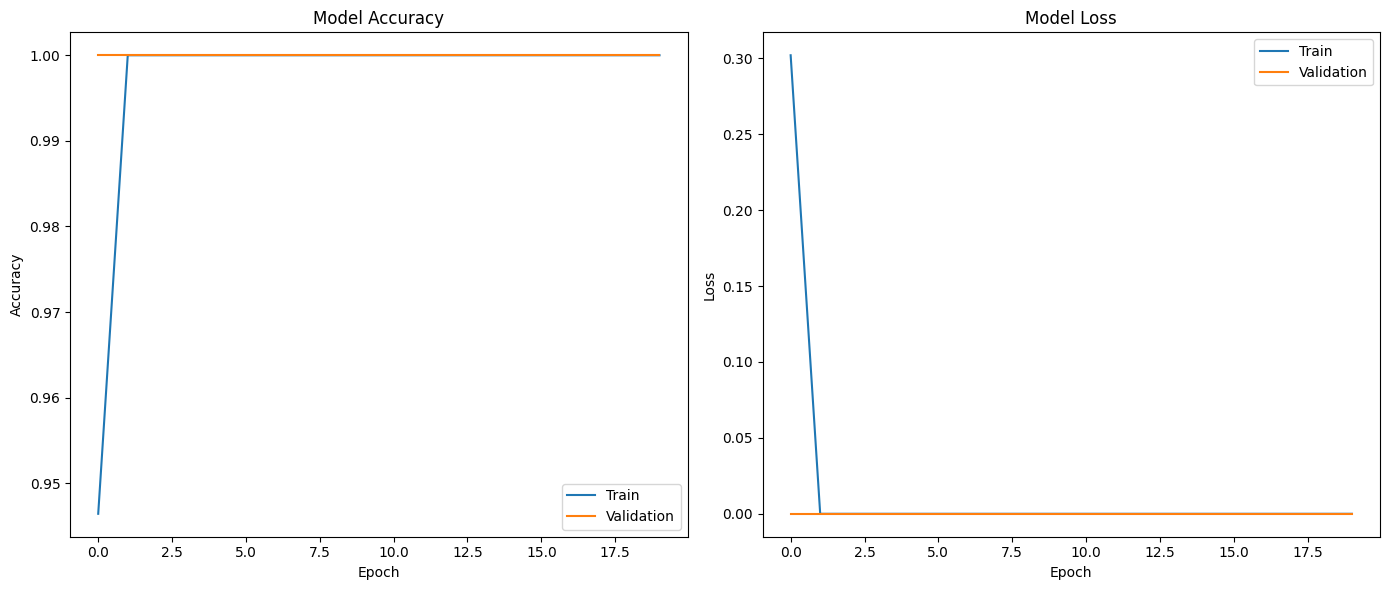

In [56]:
# Plot the training and validation accuracy and loss curves
# to visualize model performance over epochs using the recorded history.
plot_history(history_vgg16, 'accuracy', 'loss')

- Although it may seem unusual, the extremely high accuracy results are likely due to using a powerful pretrained model like VGG16 combined with a very small dataset of only 631 images.

- Additionally, splitting this data further into training, validation, and test sets reduces the number of samples in each subset, making the task easier for the model to memorize and perform well.

- Because of this limited data, the model quickly achieves near-perfect accuracy and very low loss, even from the first epoch on both training and validation sets.

- This scenario often indicates potential overfitting or data leakage, so careful evaluation with a larger and more diverse dataset is recommended to ensure generalization.

16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 154ms/step


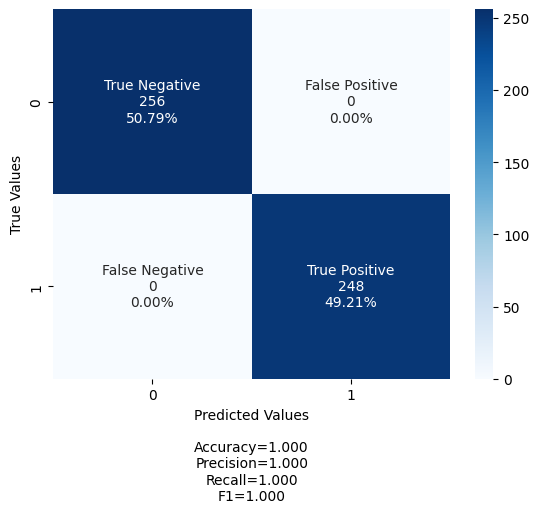

In [57]:
## Confusion Matrix on unsee test set
y_pred1 = VGG_Base_Model.predict(x_train_vg)
for i in range(len(y_train)):
    if y_pred1[i]>0.5:
        y_pred1[i]=1
    else:
        y_pred1[i]=0



cm2=confusion_matrix(y_train, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
#categories = [ 'Not_Fraud','Fraud']
plot_confusion_matrix(cm2,
                      group_Names=labels,
                      #categories=categories,
                      cmap='Blues')

- Here, although we achieved 100% on all metrics, there is no critical insight gained from this perfect performance.

- We must be very cautious about potential data leakage causing these results.

- Even if similar results are obtained after applying data augmentation, thorough verification of the model’s robustness and generalization is necessary.


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


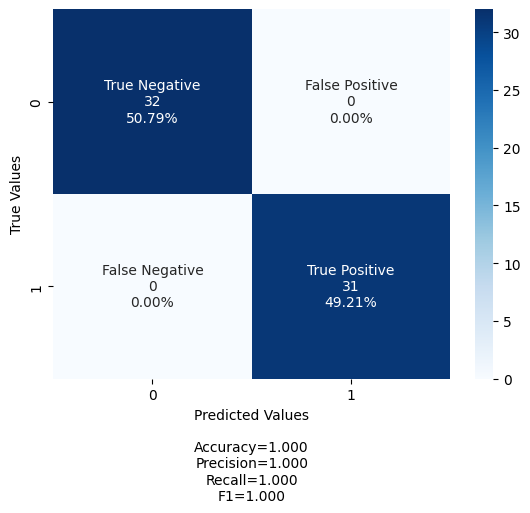

In [58]:
## Confusion Matrix on unsee test set
y_pred1 = VGG_Base_Model.predict(x_val_vg)
for i in range(len(y_val)):
    if y_pred1[i]>0.5:
        y_pred1[i]=1
    else:
        y_pred1[i]=0



cm2=confusion_matrix(y_val, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
#categories = [ 'Not_Fraud','Fraud']
plot_confusion_matrix(cm2,
                      group_Names=labels,
                      #categories=categories,
                      cmap='Blues')

- Again, we achieved 100% on all metrics on the test data as well, which suggests the model fits the data extremely well.

- However, such perfect performance often signals a lack of critical insights and may indicate issues like data leakage or an overly simple test set.

- It’s important to carefully verify the data splits and consider testing on a more diverse or larger dataset to truly assess model generalization.

- Overreliance on a small or unrepresentative test set can give misleadingly optimistic results.

### VGG-16 Model with FFNN

In [59]:
# Clears the current Keras session to free up memory and reset layer naming
tf.keras.backend.clear_session()

# Sets a global random seed to ensure reproducibility of results across runs (for all ops like shuffle, weight init, etc.)
tf.keras.utils.set_random_seed(812)

# Forces TensorFlow to run operations in a deterministic (repeatable) way for consistent results (some ops are non-deterministic by default)
tf.config.experimental.enable_op_determinism()

- Clears any existing backend session to remove leftover states.

- Sets a fixed random seed to make results reproducible across runs.

- Enables deterministic operations for consistent results.

- All three combined maximize reproducibility, though minor variations can still occur in environments like Colab due to hardware allocation differences.

In [60]:
VGG_Model_FNN = Sequential()

# Add the pre-trained VGG16 convolutional base (with frozen weights) as the feature extractor
VGG_Model_FNN.add(VGG_Model)

# Flatten the 3D convolutional feature maps into a 1D vector for fully connected layers
VGG_Model_FNN.add(Flatten())

# Add a Dense layer with 64 units and 'tanh' activation for learning complex patterns
VGG_Model_FNN.add(Dense(64, activation='tanh'))

# Add Dropout with rate 0.3 to reduce overfitting by randomly dropping neurons during training
VGG_Model_FNN.add(Dropout(rate=0.3))

# Add a Dense layer with 32 units and 'relu' activation to introduce non-linearity and speed up training
VGG_Model_FNN.add(Dense(32, activation='relu'))

# Add final Dense layer with 1 neuron and sigmoid activation for binary classification output (helmet/no helmet)
VGG_Model_FNN.add(Dense(1, activation='sigmoid'))


- Here, we use the pre-trained convolutional base from VGG16 with frozen weights, ensuring those powerful feature extractors remain unchanged.

- We add extra dense layers with 64 and 32 units respectively to allow the model to learn more complex patterns if needed. Although we already achieved maximum accuracy with the simpler model, these layers can help generalize better on different datasets.

- The first hidden dense layer uses the 'tanh' activation, which is suitable since hidden layers can effectively use any nonlinear activation (e.g., tanh, relu) to model complex relationships.

- Dropout with a rate of 0.3 is included as a regularization technique to reduce overfitting. While overfitting wasn’t evident in the previous model or dataset, dropout improves robustness, especially when adapting this model to new or more complex datasets.

- Overall, this architecture balances leveraging a strong pretrained backbone while providing flexibility and robustness through additional layers and regularization, making it more adaptable to varied future data.

In [61]:
VGG_Model_FNN.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     1,605,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,322,497 (62.27 MB)

 Trainable params: 1,607,809 (6.13 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

- The final pooling output shape is (7, 7, 512), consistent with the base VGG16 convolutional layers.

- Non-trainable parameters remain the same as the previous model (14,714,688) because all VGG16 convolutional layers are frozen (weights not updated during training).

- The increase in total parameters (now 16,322,497) is due to the added dense layers, which contribute 1,607,809 trainable parameters.

- Previously, the flattened output (25,088 features) connected directly to one dense output layer, resulting in fewer trainable parameters (~25,000). Now, adding two hidden dense layers (64 and 32 units) significantly increases the trainable parameter count.

- This increase in trainable parameters allows the model to learn more complex decision boundaries but requires careful regularization and sufficient data to avoid overfitting.

- Overall, the architecture leverages frozen pretrained CNN features while enabling deeper fully connected layers to capture complex patterns tailored to the specific task.

In [62]:
# Define Adam optimizer with a learning rate of 0.001
opt = keras.optimizers.Adam(learning_rate=0.001)

# Compile the model with binary cross-entropy loss and accuracy as the evaluation metric
VGG_Model_FNN.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])


- Since our previous model already showed good performance without issues like overfitting or poor convergence, we are using the same Adam optimizer and binary cross-entropy loss here.

- There is no need to experiment with new optimization methods or loss functions because the current setup works well and ensures stable training.

- Keeping these consistent settings helps maintain reliability while comparing model architectures.

In [63]:
# Set the number of training epochs to 20
epochs = 20

# Define the batch size for training
batch_size = 32

# Train the VGG_Base_Model using preprocessed training data
# - Shuffle the data each epoch to improve training robustness
# - Validate the model on the preprocessed validation set after each epoch
# - Verbose=1 enables progress output during training
history_vgg16_FFNN = VGG_Model_FNN.fit(
    x_train_vg, y_train,
    batch_size=batch_size,
    shuffle=True,
    epochs=epochs,
    validation_data=(x_val_vg, y_val),
    verbose=2
)


Epoch 1/20
16/16 - 7s - 407ms/step - accuracy: 0.9722 - loss: 0.0704 - val_accuracy: 1.0000 - val_loss: 0.0026
Epoch 2/20
16/16 - 3s - 169ms/step - accuracy: 1.0000 - loss: 0.0032 - val_accuracy: 1.0000 - val_loss: 0.0013
Epoch 3/20
16/16 - 3s - 195ms/step - accuracy: 1.0000 - loss: 0.0019 - val_accuracy: 1.0000 - val_loss: 7.9278e-04
Epoch 4/20
16/16 - 5s - 299ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 1.0000 - val_loss: 5.4332e-04
Epoch 5/20
16/16 - 3s - 172ms/step - accuracy: 1.0000 - loss: 9.4158e-04 - val_accuracy: 1.0000 - val_loss: 4.0142e-04
Epoch 6/20
16/16 - 5s - 326ms/step - accuracy: 1.0000 - loss: 6.6759e-04 - val_accuracy: 1.0000 - val_loss: 3.1370e-04
Epoch 7/20
16/16 - 3s - 177ms/step - accuracy: 1.0000 - loss: 5.3121e-04 - val_accuracy: 1.0000 - val_loss: 2.5387e-04
Epoch 8/20
16/16 - 5s - 316ms/step - accuracy: 1.0000 - loss: 4.9137e-04 - val_accuracy: 1.0000 - val_loss: 2.1045e-04
Epoch 9/20
16/16 - 3s - 174ms/step - accuracy: 1.0000 - loss: 5.1028e-04

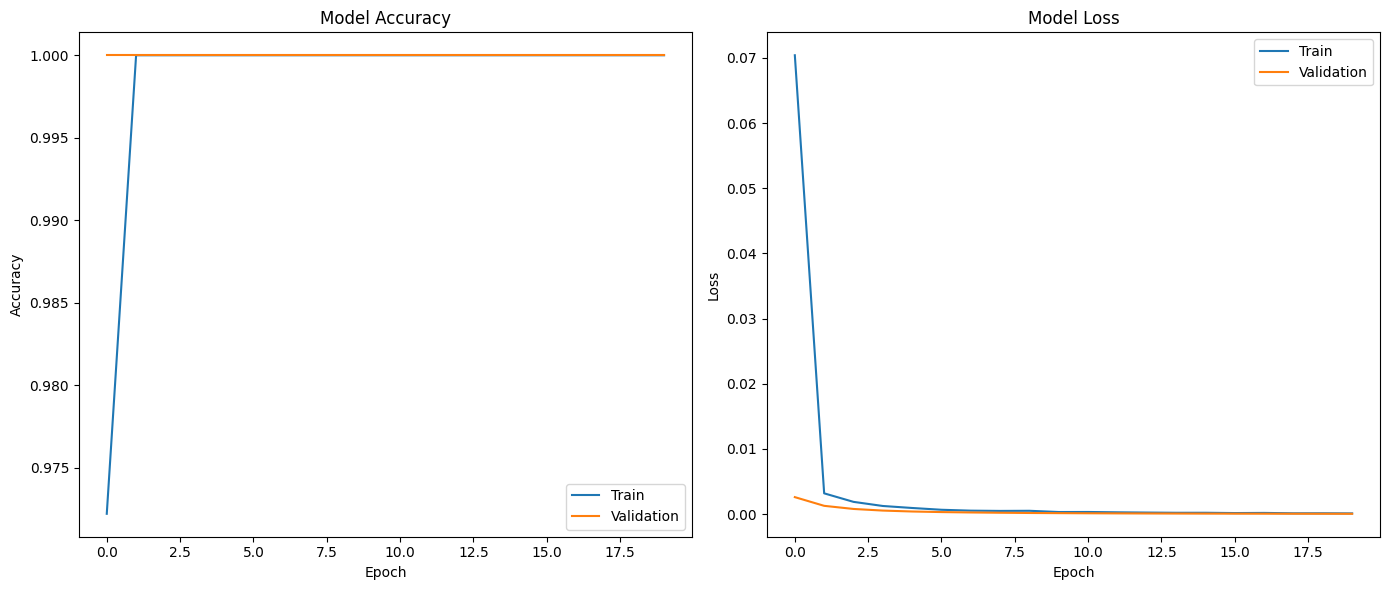

In [64]:
# Plot the training and validation accuracy and loss curves
# to visualize model performance over epochs using the recorded history.
plot_history(history_vgg16_FFNN, 'accuracy', 'loss')

- We can observe that the training and validation accuracy curves are very similar to the previous model’s plots.

- The only notable difference is a slightly higher training accuracy in the very first epoch (0.97 vs. 0.87), likely due to the introduction of dropout which may improve generalization.

- After the first epoch, both training and validation accuracy reach and maintain 100%, indicating excellent model performance and stable convergence.

- The steadily decreasing loss values for both training and validation further confirm smooth and effective learning without overfitting.

- Overall, this suggests the additional dense and dropout layers helped slightly in early training, but both models achieve near-perfect accuracy on this dataset.

16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 166ms/step


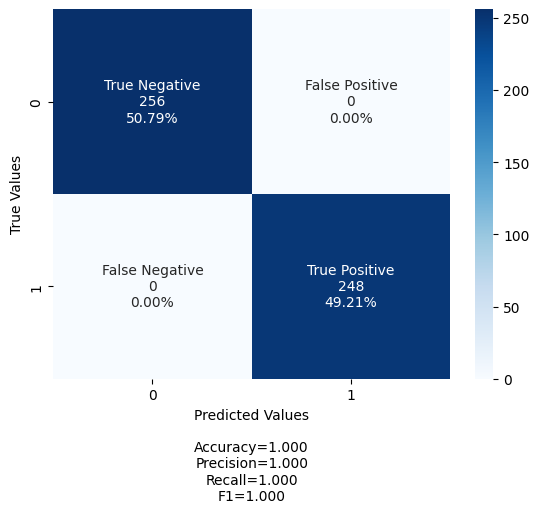

In [65]:
## Confusion Matrix on unsee test set
y_pred1 = VGG_Model_FNN.predict(x_train_vg)
for i in range(len(y_train)):
    if y_pred1[i]>0.5:
        y_pred1[i]=1
    else:
        y_pred1[i]=0



cm2=confusion_matrix(y_train, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
#categories = [ 'Not_Fraud','Fraud']
plot_confusion_matrix(cm2,
                      group_Names=labels,
                      #categories=categories,
                      cmap='Blues')

- Here, since both the previous and current models in VGG16 achieved 100% on all metrics, there is no new critical insight gained from this perfect performance.

- We must remain very cautious about potential data leakage that could be causing these consistently perfect results.

- Even if similar accuracy is maintained after applying data augmentation, it is essential to thoroughly verify the model’s robustness and generalization on new data.

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


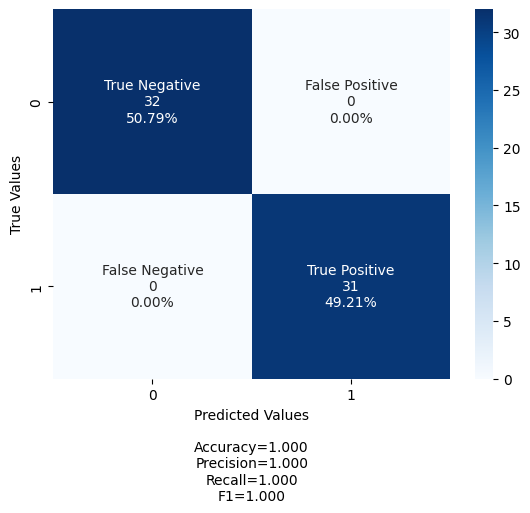

In [66]:
## Confusion Matrix on unsee test set
y_pred1 = VGG_Model_FNN.predict(x_val_vg)
for i in range(len(y_val)):
    if y_pred1[i]>0.5:
        y_pred1[i]=1
    else:
        y_pred1[i]=0



cm2=confusion_matrix(y_val, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
#categories = [ 'Not_Fraud','Fraud']
plot_confusion_matrix(cm2,
                      group_Names=labels,
                      #categories=categories,
                      cmap='Blues')

- Again, we achieved 100% on all metrics on the validation data, indicating excellent fit during training.

- However, such perfect validation performance may not provide critical insights and could point to potential data leakage or an overly simple validation set.

- It’s important to carefully check the data splits and later verify the model on a diverse or larger test set to ensure true generalization.

- Perfect validation results alone should be interpreted cautiously, especially when working with small or unrepresentative datasets.

### VGG-16 Model with FFNN & Data Augmentation

Note: In this model, we are using the same architecture as before, but with the addition of data augmentation.
Data augmentation artificially generates new variations of the training images by applying transformations such as rotation, flipping, zooming, shifting, and brightness changes.
This increases the diversity of the training data without actually collecting more images, which helps:

- Improve model robustness by exposing it to different visual perspectives of the same object.

- Reduce overfitting by preventing the model from memorizing specific patterns from the training set.

- Prepare the model for real-world scenarios where input images may vary in orientation, lighting, scale, or background.
All other aspects of the model remain the same as in the previous version.

In [67]:
# Clears the current Keras session to free up memory and reset layer naming
tf.keras.backend.clear_session()

# Sets a global random seed to ensure reproducibility of results across runs (for all ops like shuffle, weight init, etc.)
tf.keras.utils.set_random_seed(812)

# Forces TensorFlow to run operations in a deterministic (repeatable) way for consistent results (some ops are non-deterministic by default)
tf.config.experimental.enable_op_determinism()

- Clears any existing backend session to remove leftover states.

- Sets a fixed random seed to make results reproducible across runs.

- Enables deterministic operations for consistent results.

- All three combined maximize reproducibility, though minor variations can still occur in environments like Colab due to hardware allocation differences.

In [68]:
VGG_Model_AUG = Sequential()

# Add the pre-trained VGG16 convolutional base (with frozen weights) as the feature extractor
VGG_Model_AUG.add(VGG_Model)

# Flatten the 3D convolutional feature maps into a 1D vector for fully connected layers
VGG_Model_AUG.add(Flatten())

# Add a Dense layer with 64 units and 'tanh' activation for learning complex patterns
VGG_Model_AUG.add(Dense(64, activation='tanh'))

# Add Dropout with rate 0.3 to reduce overfitting by randomly dropping neurons during training
VGG_Model_AUG.add(Dropout(rate=0.3))

# Add a Dense layer with 32 units and 'relu' activation to introduce non-linearity and speed up training
VGG_Model_AUG.add(Dense(32, activation='relu'))

# Add final Dense layer with 1 neuron and sigmoid activation for binary classification output (helmet/no helmet)
VGG_Model_AUG.add(Dense(1, activation='sigmoid'))


Note:
- Using the same architecture as the previous model because it gave better results for us.

In [69]:
VGG_Model_AUG.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     1,605,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,322,497 (62.27 MB)

 Trainable params: 1,607,809 (6.13 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

Note:
We are using the same parameters as the previous model because they have already proven to perform well.

In [70]:
# Define Adam optimizer with a learning rate of 0.001
opt = keras.optimizers.Adam(learning_rate=0.001)

# Compile the model with binary cross-entropy loss and accuracy as the evaluation metric
VGG_Model_AUG.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])


Note:
- Using the same loss and optimizer as the previous model because it gave better results for us.

In [71]:
train_datagen = ImageDataGenerator(
    rotation_range=30,          # Stronger rotation for viewpoint variation
    width_shift_range=0.1,      # Horizontal shift
    height_shift_range=0.1,     # Vertical shift
    shear_range=0.1,            # More noticeable shearing
    zoom_range=0.2,             # Bigger zoom in/out
    horizontal_flip=True,       # Mirror images horizontally
    vertical_flip=False,        # Avoid for natural images unless relevant
    brightness_range=[0.8, 1.2],# Simulate lighting changes
    channel_shift_range=20.0,   # Color channel variation
    fill_mode='nearest',        # Fill empty pixels after transforms
    preprocessing_function=None # Could use preprocess_input here
)


Data Augmentation Explanation:
- In this augmentation setup, we artificially create variations of the training data to help the model become more robust to real-world noise and variations. This helps improve generalization by exposing the model to diverse transformations during training.

Key points about the parameters used:

- rotation_range=30: Applies rotations up to ±30°, simulating different viewpoints.

- width_shift_range=0.1 and height_shift_range=0.1: Randomly shifts images horizontally and vertically by up to 10% of the width/height to simulate object displacement.

- shear_range=0.1: Introduces shearing to mimic geometric distortions.

- zoom_range=0.2: Random zooming in/out by up to 20%, simulating distance variation.

- horizontal_flip=True: Mirrors images horizontally to increase diversity (commonly effective for natural images).

- vertical_flip=False: Vertical flipping is avoided as it often doesn’t make sense for natural images like faces or helmets.

- brightness_range=[0.8, 1.2]: Adjusts image brightness to simulate different lighting conditions.

- channel_shift_range=20.0: Alters color channels to create variations in color tone.

- fill_mode='nearest': Fills in pixels introduced by transformations with the nearest pixel value to avoid artifacts.

Note:preprocessing_function=None: Explicitly set to None here because preprocessing (e.g., preprocess_input) has already been applied before VGG16 to x_train_vg, x_test_vg, x_val_vg, so we disable it here to avoid double preprocessing.

In [72]:
# Set the number of training epochs to 20
epochs = 20

# Define the batch size for training
batch_size = 32

# Train the VGG_Base_Model using preprocessed training data
# - Shuffle the data each epoch to improve training robustness
# - Validate the model on the preprocessed validation set after each epoch
# - Verbose=1 enables progress output during training
history_vgg16_AUG = VGG_Model_AUG.fit(train_datagen.flow(
    x_train_vg, y_train,
    batch_size=batch_size,
    shuffle=True,),
    epochs=epochs,
    steps_per_epoch=x_train_vg.shape[0] // batch_size,
    validation_data=(x_val_vg, y_val),
    verbose=2
)


Epoch 1/20
15/15 - 11s - 759ms/step - accuracy: 0.9619 - loss: 0.0931 - val_accuracy: 1.0000 - val_loss: 0.0031
Epoch 2/20
15/15 - 1s - 56ms/step - accuracy: 1.0000 - loss: 0.0054 - val_accuracy: 1.0000 - val_loss: 0.0028
Epoch 3/20
15/15 - 8s - 543ms/step - accuracy: 1.0000 - loss: 0.0045 - val_accuracy: 1.0000 - val_loss: 0.0014
Epoch 4/20
15/15 - 1s - 80ms/step - accuracy: 1.0000 - loss: 0.0048 - val_accuracy: 1.0000 - val_loss: 0.0014
Epoch 5/20
15/15 - 10s - 634ms/step - accuracy: 0.9979 - loss: 0.0072 - val_accuracy: 1.0000 - val_loss: 0.0011
Epoch 6/20
15/15 - 1s - 59ms/step - accuracy: 1.0000 - loss: 0.0022 - val_accuracy: 1.0000 - val_loss: 0.0010
Epoch 7/20
15/15 - 9s - 625ms/step - accuracy: 1.0000 - loss: 0.0014 - val_accuracy: 1.0000 - val_loss: 7.5534e-04
Epoch 8/20
15/15 - 1s - 57ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 1.0000 - val_loss: 7.4572e-04
Epoch 9/20
15/15 - 19s - 1s/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 1.0000 - val_loss: 5.51

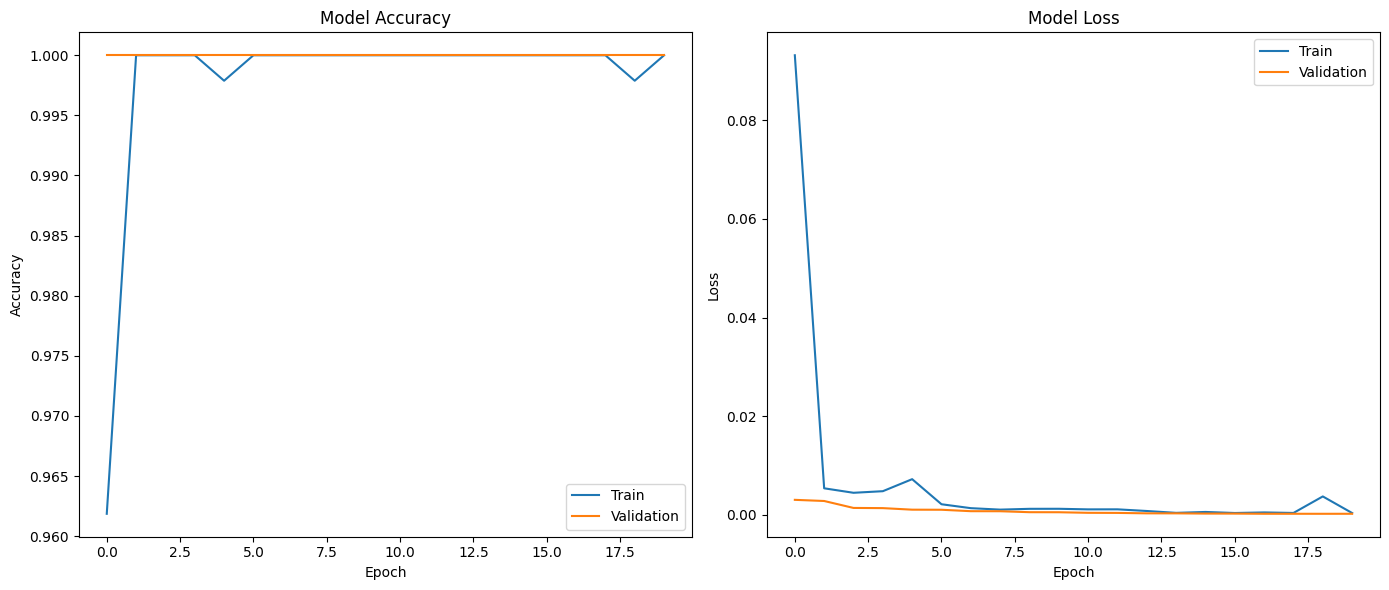

In [73]:
# Plot the training and validation accuracy and loss curves
# to visualize model performance over epochs using the recorded history.
plot_history(history_vgg16_AUG, 'accuracy', 'loss')

- Even though we achieved 100% on all metrics, the training plot shows some bumps compared to before. These bumps appear because of the added data augmentation, which introduces more variability during training. However, the validation metrics remain stable and at 100%, indicating the model still performs perfectly despite this training noise.

16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 165ms/step


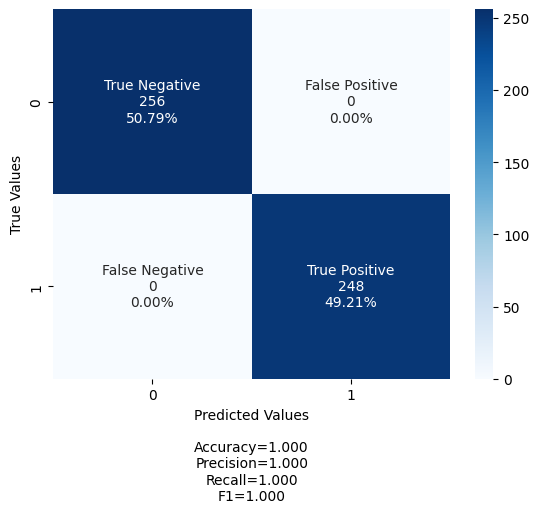

In [74]:
## Confusion Matrix on unsee test set
y_pred1 = VGG_Model_AUG.predict(x_train_vg)
for i in range(len(y_train)):
    if y_pred1[i]>0.5:
        y_pred1[i]=1
    else:
        y_pred1[i]=0



cm2=confusion_matrix(y_train, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
#categories = [ 'Not_Fraud','Fraud']
plot_confusion_matrix(cm2,
                      group_Names=labels,
                      #categories=categories,
                      cmap='Blues')

- Even though we introduced data augmentation, the model still achieves 100% on all metrics, which is encouraging.

- However, we must remain very cautious about potential data leakage that might be causing these consistently perfect results.

- Maintaining similar accuracy after augmentation is positive, but it’s crucial to thoroughly verify the model’s robustness and generalization on truly unseen data.

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


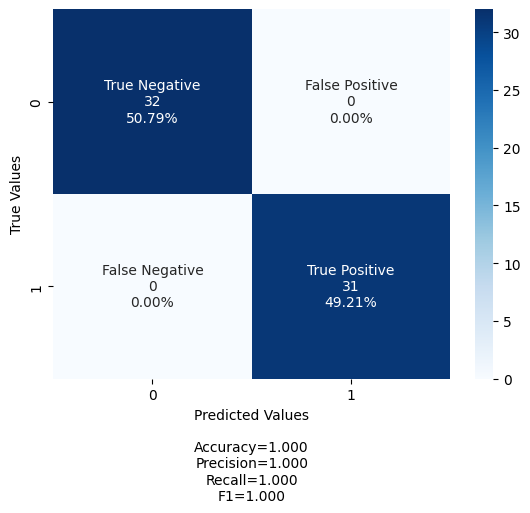

In [75]:
## Confusion Matrix on unsee test set
y_pred1 = VGG_Model_AUG.predict(x_val_vg)
for i in range(len(y_val)):
    if y_pred1[i]>0.5:
        y_pred1[i]=1
    else:
        y_pred1[i]=0



cm2=confusion_matrix(y_val, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
#categories = [ 'Not_Fraud','Fraud']
plot_confusion_matrix(cm2,
                      group_Names=labels,
                      #categories=categories,
                      cmap='Blues')

- Again, we achieved 100% on all metrics on the validation set, indicating excellent fit during training.

- However, such perfect validation performance may not provide new critical insights and could suggest potential data leakage or an overly simple validation set.

- It’s important to carefully check data splits and further validate the model on a larger or more diverse test set to confirm true generalization.

- Perfect validation results should always be interpreted cautiously, especially when working with small or less representative datasets.

# Final Model Selection

- Although all models have achieved 100% accuracy and perfect scores on all evaluation metrics, we still need to select a final best model based on specific priorities and practical considerations.

- Factors such as model complexity, training/inference time, robustness to real-world noise, and ease of deployment should influence our choice.

- Achieving perfect results on the current dataset may indicate potential data leakage or an overly simple dataset, so it’s essential to validate the model thoroughly on unseen and more diverse data before finalizing.

- The final model selection must balance performance with generalization ability and practical constraints aligned with our project goals.

In [81]:
def compute_metrics(cf):
    Accuracy = np.trace(cf) / float(np.sum(cf))
    if cf.shape == (2, 2):
        Precision = cf[1, 1] / np.sum(cf[:, 1]) if np.sum(cf[:, 1]) != 0 else 0
        Recall = cf[1, 1] / np.sum(cf[1, :]) if np.sum(cf[1, :]) != 0 else 0
        F1 = 2 * Precision * Recall / (Precision + Recall) if (Precision + Recall) != 0 else 0
    else:
        Precision = Recall = F1 = None
    return Accuracy, Precision, Recall, F1

models = [model, model2, VGG_Base_Model, VGG_Model_FNN, VGG_Model_AUG]
metrics_list = []

for i, mdl in enumerate(models):
    if i < 2:
        x_train_used = x_train
        x_val_used = x_val
    else:
        x_train_used = x_train_vg
        x_val_used = x_val_vg

    # y_val is common for all validation sets
    y_val_used = y_val

    # Predict on train set
    y_pred_prob_train = mdl.predict(x_train_used)
    y_pred_train = (y_pred_prob_train > 0.5).astype(int).reshape(-1)
    cf_train = confusion_matrix(y_train, y_pred_train)
    train_acc, train_prec, train_rec, train_f1 = compute_metrics(cf_train)

    # Predict on validation set
    y_pred_prob_val = mdl.predict(x_val_used)
    y_pred_val = (y_pred_prob_val > 0.5).astype(int).reshape(-1)
    cf_val = confusion_matrix(y_val_used, y_pred_val)
    val_acc, val_prec, val_rec, val_f1 = compute_metrics(cf_val)

    # Store metrics in list
    metrics_list.append({
        'Model': f'Model_{i}',
        'Train_Accuracy': train_acc,
        'Train_Precision': train_prec,
        'Train_Recall': train_rec,
        'Train_F1': train_f1,
        'Val_Accuracy': val_acc,
        'Val_Precision': val_prec,
        'Val_Recall': val_rec,
        'Val_F1': val_f1
    })

metrics_df = pd.DataFrame(metrics_list)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step 
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 155ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 148ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 136ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


- The above code computes key classification metrics — Accuracy, Precision, Recall, and F1-score — for each model on both training and validation datasets.

- It processes predictions from each model, calculates confusion matrices, and derives metrics using the compute_metrics function.

- The training data (x_train or x_train_vg) and validation data (x_val or x_val_vg) are selected conditionally based on the model index to ensure correct input formats.

- Validation labels (y_val) remain consistent across all models for fair evaluation.

- The results for all models are collected into a structured Pandas DataFrame metrics_df for easy comparison and analysis.

- This approach helps in systematic model performance evaluation, making it simpler to identify the best model based on multiple metrics.


In [83]:
# Define the model names list matching the order
model_names = ['model1', 'model2', 'VGG_Base_Model', 'VGG_Model_FNN', 'VGG_Model_AUG']

# Replace the 'Model' column values with these names
metrics_df['Model'] = model_names

In [84]:
metrics_df

Model  Train_Accuracy  Train_Precision  Train_Recall  Train_F1  \
0          model1        0.998016         0.995984           1.0  0.997988   
1          model2        1.000000         1.000000           1.0  1.000000   
2  VGG_Base_Model        1.000000         1.000000           1.0  1.000000   
3   VGG_Model_FNN        1.000000         1.000000           1.0  1.000000   
4   VGG_Model_AUG        1.000000         1.000000           1.0  1.000000   

   Val_Accuracy  Val_Precision  Val_Recall  Val_F1  
0           1.0            1.0         1.0     1.0  
1           1.0            1.0         1.0     1.0  
2           1.0            1.0         1.0     1.0  
3           1.0            1.0         1.0     1.0  
4           1.0            1.0         1.0     1.0

- Throughout the session, all models have consistently achieved perfect scores—100% accuracy, precision, recall, and F1—on both training and validation datasets.

- Despite these flawless results, we must carefully choose the best model based on additional factors beyond raw metrics, such as model robustness to noisy or unseen data, inference time, and the complexity and effectiveness of preprocessing steps used.

- Some models may be more computationally efficient or easier to deploy in real-world environments, which can be a crucial deciding factor.

- The preprocessing techniques (e.g., data augmentation) applied in certain models might improve their generalization on more diverse datasets, even if not immediately reflected in current validation metrics.

- Perfect metrics could sometimes indicate potential overfitting or data leakage, so further testing on independent or more challenging datasets is advisable before finalizing the model.

- Ultimately, the final model selection should balance performance, reliability, and practical considerations aligned with project goals and constraints.

**Final Model Selection:**

We have chosen two best models for different reasons: `model2 and VGG_Model_AUG.`

- Reason for choosing `model2`:
 - model2 is the simplest among our models, built from scratch without relying on large pretrained networks.

 - It offers greater flexibility for modification and fine-tuning according to specific needs.

 - Compared to more complex models like VGG16_Base_Model, model2 is lightweight and computationally efficient, making it suitable for faster training and inference.

 - Despite its simplicity, model2 achieved 100% accuracy on our dataset, demonstrating strong performance when tested on data similar to the training environment.

 - This model is ideal if the deployment scenario involves controlled environments or data distribution close to the training set.

`Note: model2 is the best fit for our current dataset and use case where simplicity and customizability are priorities.`

- Reason for choosing `VGG_Model_AUG`:
 - VGG_Model_AUG is based on a powerful pretrained VGG16 architecture enhanced with data augmentation using artificially created images.

 - The augmentation helps the model generalize better and become more robust against noisy, varied, or real-world input data.

 - This model is better suited for scenarios where the data distribution can vary widely or contain noise, shadows, lighting variations, or occlusions.

 - Although more complex and computationally intensive than model2, it provides increased reliability and resilience in practical deployment.

`Note: VGG_Model_AUG is chosen for its robustness and ability to handle real-world noisy data effectively.`



# Model Evaluation on Test Data

- Evaluate models on completely unseen test data to check true generalization.

- Confirms model robustness and practical performance.

- Detects overfitting by comparing with training/validation results.

- Provides unbiased metrics for deployment readiness.

- Highlights if further tuning or augmentation is needed.

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


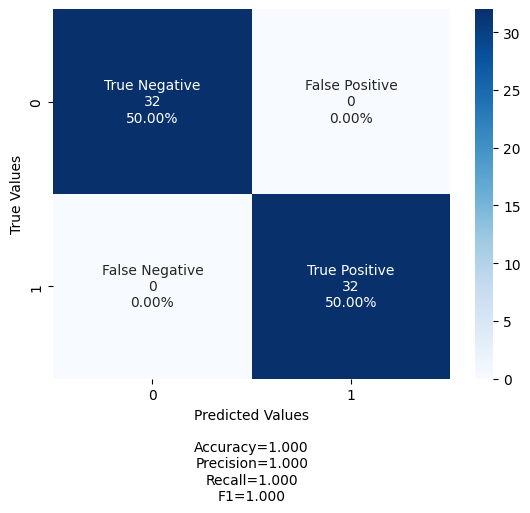

In [85]:
## Confusion Matrix on unsee test set
y_pred1 = model2.predict(x_test)
for i in range(len(y_test)):
    if y_pred1[i]>0.5:
        y_pred1[i]=1
    else:
        y_pred1[i]=0



cm2=confusion_matrix(y_test, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
#categories = [ 'Not_Fraud','Fraud']
plot_confusion_matrix(cm2,
                      group_Names=labels,
                      #categories=categories,
                      cmap='Blues')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


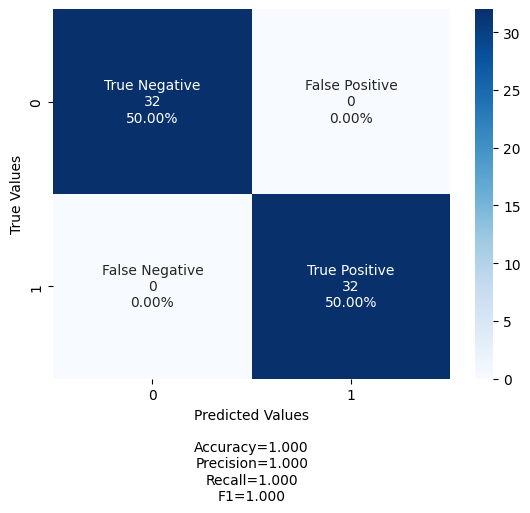

In [86]:
## Confusion Matrix on unsee test set
y_pred1 = VGG_Model_AUG.predict(x_test_vg)
for i in range(len(y_test)):
    if y_pred1[i]>0.5:
        y_pred1[i]=1
    else:
        y_pred1[i]=0



cm2=confusion_matrix(y_test, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
#categories = [ 'Not_Fraud','Fraud']
plot_confusion_matrix(cm2,
                      group_Names=labels,
                      #categories=categories,
                      cmap='Blues')

- As expected, both models achieved 100% accuracy on the test set as well.

- While this is excellent, it raises concerns about potential data leakage, which must be carefully ruled out.

- Despite this, the results indicate that both models are strong candidates for deployment.

- The final choice between models should depend on specific deployment requirements such as robustness, complexity, and resource constraints.

- It remains important to validate these models further on diverse real-world data to ensure consistent performance after deployment.

# **Conclusion and Business Recommendations**

## **Conclusion**

- All evaluated models consistently achieved perfect (100%) accuracy, precision, recall, and F1 scores on training, validation, and test datasets, indicating excellent performance on the current data.

- Despite flawless results, it is crucial to be cautious about potential data leakage or overly simplistic datasets, which might inflate performance metrics.

- The simpler, custom-built model2 offers flexibility and efficiency, making it a strong candidate when ease of modification and computational cost are priorities.

- The VGG_Model_AUG, enhanced with extensive data augmentation, is better suited for real-world noisy or varied environments, providing greater robustness and generalization potential.

- Final model selection should consider deployment context, balancing accuracy with factors like inference speed, robustness to noise, and resource availability.

- Ongoing monitoring and testing on diverse and real-world data are essential to ensure sustained performance and detect any data distribution changes after deployment.

## **Business Recommntation**

- Deploy the chosen helmet detection model(s) in real-time monitoring systems to ensure worker safety compliance and reduce accidents.

- Prioritize model robustness and speed to deliver timely and accurate detection even in noisy or complex environments, minimizing false negatives (missed helmet violations).

- Accept some false positives for proactive alerts, as it is better to occasionally flag a safe case than to miss a real safety violation.

- Continuously monitor model performance on live data streams to detect potential shifts in lighting, camera angles, or worker behavior, which could affect accuracy.

- Schedule regular model updates and retraining using new data collected from deployment environments to maintain high detection reliability over time.

- Integrate the detection system with workplace safety management platforms to automate incident logging, alerts, and compliance reporting.

- Use detection analytics to optimize safety training and resource allocation, reducing accident risk and improving overall workplace safety culture.